# Ames, Iowa Housing Analysis and Modelling

## Problem Statement
[*Jump to table of contents*](#Contents)

Heavily driven by the market, housing prices are a reflection of consumer behaviour that highlights preferences of the overall population. In this analysis, we will be contructing various ridge, lasso, and elastic net regression models to predict housing prices in Ames, Iowa. This will not only allow us to forecast future prices, but will also give us points of inference from which we can better understand consumer behaviour.

We will be utilizing the Ames Housing Dataset that documents housing sales from 2006 to 2010. From the location of the home to the interior finish of the garage, this dataset is extremely comprehensive and contains well over 80 features. The provided data dictionary is reflected below, along with an aditional column describing the corresponding data type.

The main metric we will be using to assess the models is RMSE (root mean squared error) as it allows us to accurately assess how a model performs both on train and test data. Although we are optimizing for RMSE, we will also be looking at adjusted R2 to compare between models. We will be limiting our features to between 25 to 30, in order to balance interpretability and accuracy. 

This analysis will largely benefit real estate companies interested in Ames to make better business decisions, but will also benefit individuals looking for a home by allowing them to understand how their preferences may affect the price of a home. In this analysis, we will be looking to answer the following questions:
* What features are most relevant for a real estate developer to increase the price of a home?
* In what ways can a real estate developer re-allocate flooring space to increase the price of a home?
* What feature quality is the most relevant to the price of a home?
* What locations should prospective home-owners avoid if they are on a tight budget?
* What features should home-owners exclude to reduce cost?

We will determine this analysis successfuly if we can produce a model with 25-30 features that has a RMSE under 35000, and is able to provide meaningful answers to our business problems.

## Data Dictionary
[*Jump to table of contents*](#Contents)

|#|Feature|Type|Description|Legend|
|:---|:---|:---|:---|:---|
|1|Id|Numerical|The record ID.|N/A|
|2|PID|Numerical|The sale ID number.|N/A|
|3|MS SubClass|Nominal|The building class.|20 1-STORY 1946 & NEWER ALL STYLES<br>30 1-STORY 1945 & OLDER<br>40 1-STORY W/FINISHED ATTIC ALL AGES<br>45 1-1/2 STORY - UNFINISHED ALL AGES<br>50 1-1/2 STORY FINISHED ALL AGES<br>60 2-STORY 1946 & NEWER<br>70 2-STORY 1945 & OLDER<br>75 2-1/2 STORY ALL AGES<br>80 SPLIT OR MULTI-LEVEL<br>85 SPLIT FOYER<br>90 DUPLEX - ALL STYLES AND AGES<br>120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER<br>150 1-1/2 STORY PUD - ALL AGES<br>160 2-STORY PUD - 1946 & NEWER<br>180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER<br>190 2 FAMILY CONVERSION - ALL STYLES AND AGES
|4|MS Zoning|Nominal|Identifies the general zoning classification of the sale.|A Agriculture<br>C Commercial<br>FV Floating Village Residential<br>I Industrial<br>RH Residential High Density<br>RL Residential Low Density<br>RP Residential Low Density Park<br>RM Residential Medium Density|
|5|Lot Frontage|Numerical|Linear feet of street connected to property.|N/A|
|6|Lot Area|Numerical|Lot size in square feet.|N/A|
|7|Street|Nominal|Type of road access to property.|Grvl Gravel<br>Pave Paved|
|8|Alley|Nominal|Type of alley access to property.|Grvl Gravel<br>Pave Paved<br>NA No alley access|
|9|Lot Shape|Ordinal|General shape of property.|Reg Regular<br>IR1 Slightly irregular<br>IR2 Moderately Irregular<br>IR3 Irregular|
|10|Land Contour|Nominal|Flatness of the property.|Lvl Near Flat/Level<br>Bnk Banked - Quick and significant rise from street grade to building<br>HLS Hillside - Significant slope from side to side<br>Low Depression|
|11|Utilities|Ordinal|Type of utilities available.|AllPub All public Utilities (E,G,W,& S)<br>NoSewr Electricity, Gas, and Water (Septic Tank)<br>NoSeWa Electricity and Gas Only<br>ELO Electricity only|
|12|Lot Config|Nominal|Lot configuration.|Inside Inside lot<br>Corner Corner lot<br>CulDSac Cul-de-sac<br>FR2 Frontage on 2 sides of property<br>FR3 Frontage on 3 sides of property|
|13|Land Slope|Ordinal|Slope of property.|Gtl Gentle slope<br>Mod Moderate Slope<br>Sev Severe Slope|
|14|Neighborhood|Nominal|Physical locations within Ames city limits.|Blmngtn Bloomington Heights<br>Blueste Bluestem<br>BrDale Briardale<br>BrkSide Brookside<br>ClearCr Clear Creek<br>CollgCr College Creek<br>Crawfor Crawford<br>Edwards Edwards<br>Gilbert Gilbert<br>IDOTRR Iowa DOT and Rail Road<br>MeadowV Meadow Village<br>Mitchel Mitchell<br>Names North Ames<br>NoRidge Northridge<br>NPkVill Northpark Villa<br>NridgHt Northridge Heights<br>NWAmes Northwest Ames<br>OldTown Old Town<br>SWISU South & West of Iowa State University<br>Sawyer Sawyer<br>SawyerW Sawyer West<br>Somerst Somerset<br>StoneBr Stone Brook<br>Timber Timberland<br>Veenker Veenker|
|15|Condition 1|Nominal|Proximity to main road or railroad.|Artery Adjacent to arterial street<br>Feedr Adjacent to feeder street<br>Norm Normal<br>RRNn Within 200' of North-South Railroad<br>RRAn Adjacent to North-South Railroad<br>PosN Near positive off-site feature--park, greenbelt, etc.<br>PosA Adjacent to postive off-site feature<br>RRNe Within 200' of East-West Railroad<br>RRAe Adjacent to East-West Railroad|
|16|Condition 2|Nominal|Proximity to main road or railroad (if a second is present).|Artery Adjacent to arterial street<br>Feedr Adjacent to feeder street<br>Norm Normal<br>RRNn Within 200' of North-South Railroad<br>RRAn Adjacent to North-South Railroad<br>PosN Near positive off-site feature--park, greenbelt, etc.<br>PosA Adjacent to postive off-site feature<br>RRNe Within 200' of East-West Railroad<br>RRAe Adjacent to East-West Railroad|
|17|Bldg Type|Nominal|Type of dwelling.|1Fam Single-family Detached<br>2FmCon Two-family Conversion; originally built as one-family dwelling<br>Duplx Duplex<br>TwnhsE Townhouse End Unit<br>TwnhsI Townhouse Inside Unit|
|18|House Style|Nominal|Style of dwelling.|1Story One story<br>1.5Fin One and one-half story: 2nd level finished<br>1.5Unf One and one-half story: 2nd level unfinished<br>2Story Two story<br>2.5Fin Two and one-half story: 2nd level finished<br>2.5Unf Two and one-half story: 2nd level unfinished<br>SFoyer Split Foyer<br>SLvl Split Level|
|19|Overall Qual|Numerical|Overall material and finish quality.|10 Very Excellent<br>9 Excellent<br>8 Very Good<br>7 Good<br>6 Above Average<br>5 Average<br>4 Below Average<br>3 Fair<br>2 Poor<br>1 Very Poor|
|20|Overall Cond|Numerical|Overall condition rating.|10 Very Excellent<br>9 Excellent<br>8 Very Good<br>7 Good<br>6 Above Average<br>5 Average<br>4 Below Average<br>3 Fair<br>2 Poor<br>1 Very Poor|
|21|Year Built|Numerical|Original construction date.|N/A|
|22|Year Remod/Add|Numerical|Remodel date (same as construction date if no remodeling or additions).|N/A|
|23|Roof Style|Nominal|Type of roof.|Flat Flat<br>Gable Gable<br>Gambrel Gabrel (Barn)<br>Hip Hip<br>Mansard Mansard<br>Shed Shed|
|24|Roof Matl|Nominal|Roof material.|ClyTile Clay or Tile<br>CompShg Standard (Composite) Shingle<br>Membran Membrane<br>MetalMetal<br>Roll Roll<br>Tar&Grv Gravel & Tar<br>WdShake Wood Shakes<br>WdShngl Wood Shingles|
|25|Exterior 1st|Nominal|Exterior covering on house.|AsbShng Asbestos Shingles<br>AsphShn Asphalt Shingles<br>BrkComm Brick Common<br>BrkFace Brick Face<br>CBlock Cinder Block<br>CemntBd Cement Board<br>HdBoard Hard Board<br>ImStucc Imitation Stucco<br>MetalSd Metal Siding<br>Other Other<br>Plywood Plywood<br>PreCast PreCast<br>Stone Stone<br>Stucco Stucco<br>VinylSd Vinyl Siding<br>Wd Sdng Wood Siding<br>WdShing Wood Shingles|
|26|Exterior 2nd|Nominal|Exterior covering on house (if more than one material).|AsbShng Asbestos Shingles<br>AsphShn Asphalt Shingles<br>BrkComm Brick Common<br>BrkFace Brick Face<br>CBlock Cinder Block<br>CemntBd Cement Board<br>HdBoard Hard Board<br>ImStucc Imitation Stucco<br>MetalSd Metal Siding<br>Other Other<br>Plywood Plywood<br>PreCast PreCast<br>Stone Stone<br>Stucco Stucco<br>VinylSd Vinyl Siding<br>Wd Sdng Wood Siding<br>WdShing Wood Shingles|
|27|Mas Vnr Type|Nominal|Masonry veneer type.|BrkCmn Brick Common<br>BrkFace Brick Face<br>CBlock Cinder Block<br>None None<br>Stone Stone|
|28|Mas Vnr Area|Numerical|Masonry veneer area in square feet.|N/A|
|29|Exter Qual|Ordinal|Exterior material quality.|Ex Excellent<br>Gd Good<br>TA Average/Typical<br>Fa Fair<br>Po Poor|
|30|Exter Cond|Ordinal|Present condition of the material on the exterior.|Ex Excellent<br>Gd Good<br>TA Average/Typical<br>Fa Fair<br>Po Poor|
|31|Foundation|Nominal|Type of foundation.|BrkTil Brick & Tile<br>CBlock Cinder Block<br>PConc Poured Contrete<br>Slab Slab<br>Stone Stone<br>Wood Wood|
|32|Bsmt Qual|Ordinal|Height of the basement.|Ex Excellent (100+ inches)<br>Gd Good (90-99 inches)<br>TA Typical (80-89 inches)<br>Fa Fair (70-79 inches)<br>Po Poor (<70 inches)<br>NA No Basement|
|33|Bsmt Cond|Ordinal|General condition of the basement.|Ex Excellent<br>Gd Good<br>TA Typical - slight dampness allowed<br>Fa Fair - dampness or some cracking or settling<br>Po Poor - Severe cracking, settling, or wetness<br>NA No Basement|
|34|Bsmt Exposure|Ordinal|Walkout or garden level basement walls.|Gd Good Exposure<br>Av Average Exposure (split levels or foyers typically score average or above)<br>Mn Mimimum Exposure<br>No No Exposure<br>NA No Basement|
|35|BsmtFin Type 1|Ordinal|Quality of basement finished area.|GLQ Good Living Quarters<br>ALQ Average Living Quarters<br>BLQBelow Average Living Quarters<br>Rec Average Rec Room<br>LwQ Low Quality<br>Unf Unfinshed<br>NA No Basement|
|36|BsmtFin SF 1|Numerical|Type 1 finished square feet.|N/A|
|37|BsmtFin Type 2|Ordinal|Quality of second finished area (if present).|GLQ Good Living Quarters<br>ALQ Average Living Quarters<br>BLQ Below Average Living Quarters<br>Rec Average Rec Room<br>LwQ Low Quality<br>Unf Unfinshed<br>NA No Basement|
|38|BsmtFin SF 2|Numerical|Type 2 finished square feet.|N/A|
|39|Bsmt Unf SF|Numerical|Unfinished square feet of basement area.|N/A|
|40|Total Bsmt SF|Numerical|Total square feet of basement area.|N/A|
|41|Heating|Nominal|Type of heating.|Floor Floor Furnace<br>GasA Gas forced warm air furnace<br>GasW Gas hot water or steam heat<br>Grav Gravity furnace<br>OthW Hot water or steam heat other than gas<br>Wall Wall furnace|
|42|Heating QC|Ordinal|Heating quality and condition.|Ex Excellent<br>Gd Good<br>TA Average/Typical<br>Fa Fair<br>Po Poor|
|43|Central Air|Nominal|Central air conditioning.|N No<br>Y Yes|
|44|Electrical|Nominal|Electrical system.|SBrkr Standard Circuit Breakers & Romex<br>FuseA Fuse Box over 60 AMP and all Romex wiring (Average)<br>FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)<br>FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)<br>Mix Mixed|
|45|1st Flr SF|Numerical|First Floor square feet.|N/A|
|46|2nd Flr SF|Numerical|Second floor square feet.|N/A|
|47|Low Qual Fin SF|Numerical|Low quality finished square feet (all floors).|N/A|
|48|Gr Liv Area|Numerical|Above grade (ground) living area square feet.|N/A|
|49|Bsmt Full Bath|Numerical|Basement full bathrooms.|N/A|
|50|Bsmt Half Bath|Numerical|Basement half bathrooms.|N/A|
|51|Full Bath|Numerical|Full bathrooms above grade.|N/A|
|52|Half Bath|Numerical|Half baths above grade.|N/A|
|53|Bedroom AbvGr|Numerical|Number of bedrooms above basement level.|N/A|
|54|Kitchen AbvGr|Numerical|Number of kitchens.|N/A|
|55|Kitchen Qual|Ordinal|Kitchen quality.|Ex Excellent<br>Gd Good<br>TA Typical/Average<br>Fa Fair<br>Po Poor|
|56|TotRms AbvGrd|Numerical|Total rooms above grade (does not include bathrooms).|N/A|
|57|Functional|Ordinal|Home functionality rating.|Typ Typical Functionality<br>Min1 Minor Deductions 1<br>Min2 Minor Deductions 2<br>Mod Moderate Deductions<br>Maj1 Major Deductions 1<br>Maj2 Major Deductions 2<br>Sev Severely Damaged<br>Sal Salvage only|
|58|Fireplaces|Numerical|Number of fireplaces.|N/A|
|59|Fireplace Qu|Ordinal|Fireplace quality.|Ex Excellent - Exceptional Masonry Fireplace<br>Gd Good - Masonry Fireplace in main level<br>TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement<br>Fa Fair - Prefabricated Fireplace in basement<br>Po Poor - Ben Franklin Stove<br>NA No Fireplace|
|60|Garage Type|Nominal|Garage location.|2Types More than one type of garage<br>Attchd Attached to home<br>Basment Basement Garage<br>BuiltIn Built-In (Garage part of house - typically has room above garage)<br>CarPort Car Port<br>Detchd Detached from home<br>NA No Garage|
|61|Garage Yr Blt|Numerical|Year garage was built.|N/A|
|62|Garage Finish|Ordinal|Interior finish of the garage.|Fin Finished<br>RFn Rough Finished<br>Unf Unfinished<br>NA No Garage|
|63|Garage Cars|Numerical|Size of garage in car capacity.|N/A|
|64|Garage Area|Numerical|Size of garage in square feet.|N/A|
|65|Garage Qual|Ordinal|Garage quality.|Ex Excellent<br>Gd Good<br>TA Typical/Average<br>Fa Fair<br>Po Poor<br>NA No Garage|
|66|Garage Cond|Ordinal|Garage condition.|Ex Excellent<br>Gd Good<br>TA Typical/Average<br>Fa Fair<br>Po Poor<br>NA No Garage|
|67|Paved Drive|Ordinal|Paved driveway.|Y Paved<br>P Partial Pavement<br>N Dirt/Gravel|
|68|Wood Deck SF|Numerical|Wood deck area in square feet|N/A|
|69|Open Porch SF|Numerical|Open porch area in square feet|N/A|
|70|Enclosed Porch|Numerical|Enclosed porch area in square feet|N/A|
|71|3Ssn Porch|Numerical|Three season porch area in square feet.|N/A|
|72|Screen Porch|Numerical|Screen porch area in square feet.|N/A|
|73|Pool Area|Numerical|Pool area in square feet.|N/A|
|74|Pool QC|Ordinal|Pool quality.|Ex Excellent<br>Gd Good<br>TA Average/Typical<br>Fa Fair<br>NA No Pool|
|75|Fence|Nominal|Fence quality.|GdPrv Good Privacy<br>MnPrv Minimum Privacy<br>GdWo Good Wood<br>MnWw Minimum Wood/Wire<br>NA No Fence|
|76|Misc Feature|Nominal|Miscellaneous feature not covered in other categories.|Elev Elevator<br>Gar2 2nd Garage (if not described in garage section)<br>Othr Other<br>Shed Shed (over 100 SF)<br>TenC Tennis Court<br>NA None|
|77|Misc Val|Numerical|$Value of miscellaneous feature.|N/A|
|78|Mo Sold|Numerical|Month Sold.|N/A|
|79|Yr Sold|Numerical|Year Sold.|N/A|
|80|Sale Type|Nominal|Type of sale.|WD Warranty Deed - ConventionalCWD Warranty Deed - Cash<br>VWD Warranty Deed - VA Loan<br>New Home just constructed and sold<br>COD Court Officer Deed/Estate<br>Con Contract 15% Down payment regular terms<br>ConLw Contract Low Down payment and low interest<br>ConLI Contract Low Interest<br>ConLD Contract Low Down<br>Oth Other|
|81|SalePrice|Numerical|The property's sale price in dollars. This is the target variable that we are trying to predict.|N/A|

[*Jump to table of contents*](#Contents)

## Contents
* [Problem Statement](#Problem-Statement)
* [Data Dictionary](#Data-Dictionary)
* [Contents](#Contents)


* 1. [Data Cleaning](#1.-Data-Cleaning)
    *  1.1 [Library Imports](#1.1-Library-Imports)
    *  1.2 [Dataset Imports](#1.2-Dataset-Imports)
    *  1.3 [First Look (Head, Shape, Type, Null)](#1.3-First-Look-(Head,-Shape,-Type,-Null))
    *  1.4 [Handling Null Values](#1.4-Handling-Null-Values)
        * 1.4.1 [Categorical Null Values](#1.4.1-Categorical-Null-Values)
        * 1.4.2 [Numerical Null Values](#1.4.2-Numerical-Null-Values)
            * 1.4.2a [Lot Frontage](#1.4.2a-Lot-Frontage)
            * 1.4.2b [Garage Yr Blt](#1.4.2b-Garage-Yr-Blt)
            * 1.4.2c [Mas Vnr Area](#1.4.2c-Mas-Vnr-Area)
    *  1.5 [Mapping of Ordinal Data](#1.5-Mapping-of-Ordinal-Data)
    *  1.6 [Standardizing Column Names](#1.6-Standardizing-Column-Names)
* 2. [EDA](#2.-EDA)
    *  2.1 [EDA - Numerical](#2.1-EDA---Numerical)
        * 2.1.1 [Numerical Above Threshold](#2.1.1-Numerical-Above-Threshold)
        * 2.1.2a [Numerical Within Threshold 1](#2.1.2a-Numerical-Within-Threshold-1)
        * 2.1.2b [Numerical Within Threshold 2](#2.1.2b-Numerical-Within-Threshold-2)
        * 2.1.2c [Numerical Within Threshold 3](#2.1.2c-Numerical-Within-Threshold-3)
    *  2.2 [EDA - Ordinal](#2.2-EDA---Ordinal)
        * 2.2.1 [Ordinal Above Threshold](#2.2.1-Ordinal-Above-Threshold)
        * 2.2.2 [Ordinal Within Threshold](#2.2.2-Ordinal-Within-Threshold)
    *  2.3 [EDA - Nominal](#2.3-EDA---Nominal)
        * 2.3.1 [Nominal Above Threshold](#2.3.1-Nominal-Above-Threshold)
        * 2.3.2 [Nominal Within Threshold](#2.3.2-Nominal-Within-Threshold)
* 3. [Feature Selection](#3.-Feature-Selection/Engineering)
    *  3.1 [Low Correlation With 'saleprice'](#3.1-Low-Correlation-With-'saleprice')
    *  3.2 [Reduction of Multicollinearity](#3.2-Reduction-of-Multicollinearity)
* 4. [Model Selection](#4.-Model-Selection)
    *  4.1 [Baseline Model](#4.1-Baseline-Model)
    *  4.2 [Iterative Optimization of RMSE](#4.2-Iterative-Optimization-of-RMSE)
    *  4.3 [Regression Metrics Analysis](#4.3-Regression-Metrics-Analysis)
* 5. [Final Model Analysis](#5.-Final-Model-Analysis)
    *  5.1 [Comparison of Baseline and Final Model](#5.1-Comparison-of-Baseline-and-Final-Model)
    *  5.2 [Analysis of Final Model](#5.2-Analysis-of-Final-Model)
* 6. [Kaggle Submission](#6.-Kaggle-Submission)
    *  6.1 [Test Set Cleaning](#6.1-Test-Set-Cleaning)
    *  6.2 [Test Set Prediction & Results](#6.2-Test-Set-Prediction-&-Results)

* 7. [Conclusion](#7.-Conclusion)
    *  7.1 [Business Recommendations](#7.1-Business-Recommendations)
    *  7.2 [Limitations](#7.2-Limitations)
    *  7.3 [Conclusion](#7.3-Conclusion)
    *  7.4 [Further Work](#7.4-Further-Work)
    *  7.5 [Citations](#7.5-Citations)


* [Runtime](#Runtime)

## 1. Data Cleaning
[*Jump to table of contents*](#Contents)

### 1.1 Library Imports
[*Jump to table of contents*](#Contents)

In [1]:
# Standard library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and metric imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Regression model imports
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Additional imports
import time

# Notebook style
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# Track start time of execution
start_time = time.time()

### 1.2 Dataset Imports
[*Jump to table of contents*](#Contents)

In [3]:
# Importing dataset
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

In [4]:
# Save a backup
new_train = train


---


### 1.3 First Look (Head, Shape, Type, Null)
[*Jump to table of contents*](#Contents)

In [5]:
# Display first 5 lines of 'train' dataframe
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# Display first 5 lines of 'test' dataframe
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


Dataframe heads are as expected with nothing out of the ordinary.

---


In [7]:
# View shape of 'train' dataframe
train.shape

(2051, 81)

In [8]:
# View shape of 'test' dataframe
test.shape

(879, 80)

Shapes are as expected, with train having 1 additional column for target variable.

---


In [9]:
# Saving dtypes to variable as dataframe
train_types = train.dtypes.to_frame()

# Transform dataframe to display first three rows of all categorical features
train[train_types[train_types[0] == 'object'].index].head(3).T

,0,1,2
MS Zoning,RL,RL,RL
Street,Pave,Pave,Pave
Alley,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg
Land Contour,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub
Lot Config,CulDSac,CulDSac,Inside
Land Slope,Gtl,Gtl,Gtl
Neighborhood,Sawyer,SawyerW,NAmes
Condition 1,RRAe,Norm,Norm


In [10]:
# Transform dataframe to display first three rows of all numerical features
train[train_types[train_types[0] != 'object'].index].head(3).T

,0,1,2
Id,109.0,544.0,153.0
PID,533352170.0,531379050.0,535304180.0
MS SubClass,60.0,60.0,20.0
Lot Frontage,NaN,43.0,68.0
Lot Area,13517.0,11492.0,7922.0
Overall Qual,6.0,7.0,5.0
Overall Cond,8.0,5.0,7.0
Year Built,1976.0,1996.0,1953.0
Year Remod/Add,2005.0,1997.0,2007.0
Mas Vnr Area,289.0,132.0,0.0


Categorical data seems to be correct with no numerical values saved as 'object' type. However, features 'MS SubClass' and 'Mo Sold' will have to be re-mapped as it should be ordinal.

In [11]:
# Converting 'MS SubClass' column to string
train['MS SubClass'] = pd.Series(np.array([str(i) for i in train['MS SubClass']]))

In [12]:
train.dtypes['MS SubClass']

dtype('O')

In [13]:
# Converting 'Mo Sold' column to string
train['Mo Sold'] = pd.Series(np.array([str(i) for i in train['Mo Sold']]))

In [14]:
train.dtypes['Mo Sold']

dtype('O')

---

In [15]:
# Saving dtypes to variable as dataframe
train_types = train.dtypes.to_frame()

# Assigning non-object column names to variable 'non_object_column_names'
non_object_column_names = train_types[train_types[0] != 'object'].index
non_object_column_names

Index(['Id', 'PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Yr Sold', 'SalePrice'],
      dtype='object')

In [16]:
# Using for loop to check for negative values in numerical columns
for index, value in enumerate(non_object_column_names):
    print(value, train[train[non_object_column_names[index]]<0].shape)

Id (0, 81)
PID (0, 81)
Lot Frontage (0, 81)
Lot Area (0, 81)
Overall Qual (0, 81)
Overall Cond (0, 81)
Year Built (0, 81)
Year Remod/Add (0, 81)
Mas Vnr Area (0, 81)
BsmtFin SF 1 (0, 81)
BsmtFin SF 2 (0, 81)
Bsmt Unf SF (0, 81)
Total Bsmt SF (0, 81)
1st Flr SF (0, 81)
2nd Flr SF (0, 81)
Low Qual Fin SF (0, 81)
Gr Liv Area (0, 81)
Bsmt Full Bath (0, 81)
Bsmt Half Bath (0, 81)
Full Bath (0, 81)
Half Bath (0, 81)
Bedroom AbvGr (0, 81)
Kitchen AbvGr (0, 81)
TotRms AbvGrd (0, 81)
Fireplaces (0, 81)
Garage Yr Blt (0, 81)
Garage Cars (0, 81)
Garage Area (0, 81)
Wood Deck SF (0, 81)
Open Porch SF (0, 81)
Enclosed Porch (0, 81)
3Ssn Porch (0, 81)
Screen Porch (0, 81)
Pool Area (0, 81)
Misc Val (0, 81)
Yr Sold (0, 81)
SalePrice (0, 81)


No negative values were found in numerical features.

---


### 1.4 Handling Null Values
[*Jump to table of contents*](#Contents)

In [17]:
# Saving sum of null values in each column into variable 'nullvalues'
nullvalues = train.isnull().sum()
nullvalues[nullvalues!=0].index

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'],
      dtype='object')

In [18]:
# # Display data type of columns containing null values
# train[nullvalues[nullvalues!=0].index].dtypes 
# Display columns containing null values that are of type 'float64'
train[nullvalues[nullvalues!=0].index].dtypes[train.dtypes == 'float64']

Lot Frontage      float64
Mas Vnr Area      float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
dtype: object

In [19]:
# Display columns containing null values that are of type 'object'
train[nullvalues[nullvalues!=0].index].dtypes[train.dtypes == 'object']

Alley             object
Mas Vnr Type      object
Bsmt Qual         object
Bsmt Cond         object
Bsmt Exposure     object
BsmtFin Type 1    object
BsmtFin Type 2    object
Fireplace Qu      object
Garage Type       object
Garage Finish     object
Garage Qual       object
Garage Cond       object
Pool QC           object
Fence             object
Misc Feature      object
dtype: object

In [20]:
# Saving categorical column names as new variable
categorical_null_columns = train[nullvalues[nullvalues!=0].index].dtypes[train.dtypes == 'object'].index

In [21]:
# Display columns containing null values
train.isnull().sum()[train.isnull().sum() != 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

There is a significant amount of null values that have to be cleaned, and perhaps some features may have to be dropped as well.

---


#### 1.4.1 Categorical Null Values
[*Click to return to contents*](#Contents)

Based on the data dictionary, null values in some columns are actually cases where there the feature does not apply. For these features, we will replace the null value with a string. These features are: 'Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature'. We will replace null values with the string 'None', indicating that the obseration does not have this feature.

In [22]:
# Check if features contain value 'None'
unique_list = []
for value in ['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',\
              'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',\
              'Garage Type', 'Garage Finish', 'Garage Qual',\
              'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']:
    unique_list.extend(train[value].unique())
'None' in unique_list

False

As there are no unique values in the features with the string 'None', we can safely replace NaN values with 'None'.

In [23]:
# Replace NaN with 'None'
for value in ['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',\
              'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',\
              'Garage Type', 'Garage Finish', 'Garage Qual',\
              'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']:
    train[value] = train[value].replace(np.nan, 'None')

In [24]:
# Display columns containing null values that are of type 'object'
nullvalues = train.isnull().sum()
train[nullvalues[nullvalues!=0].index].dtypes[train.dtypes == 'object']

Mas Vnr Type    object
dtype: object

As the column 'Mas Vnr Type' still contains null values, we will map it to a string that is not used to see the distribution more clearly.

In [25]:
# View unique values of 'Mas Vnr Type'
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [26]:
# Replace NaN values with 'Null'
train['Mas Vnr Type'] = train['Mas Vnr Type'].replace(np.nan, 'Null')

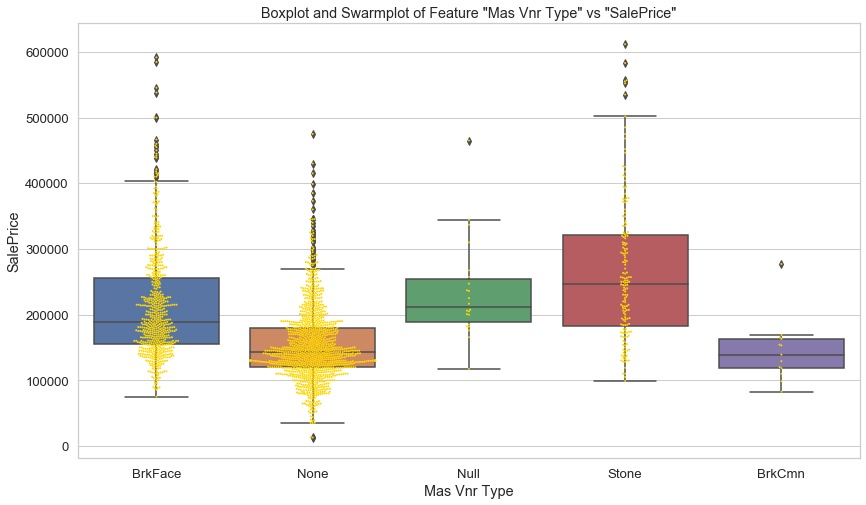

In [27]:
# Boxplot & swarmplot of 'Mas Vnr Type' vs 'SalePrice'
plt.figure(figsize = (14,8))
g = sns.boxplot(train['Mas Vnr Type'],train['SalePrice'])
sns.swarmplot(train['Mas Vnr Type'],train['SalePrice'], color = 'gold', edgecolor = 'black', size = 2)
g.set_title('Boxplot and Swarmplot of Feature "Mas Vnr Type" vs "SalePrice"');

Of the top two most populated categories in 'Mas Vnr Type', we will impute the 'Null' values into the 'None' category. This is because the 'None' category is the most populated, hence it is less likely that the data will be significantly skewed from the imputation.

In [28]:
# Converting 'Null' values to 'None'
train['Mas Vnr Type'] = train['Mas Vnr Type'].str.replace('Null', 'None')

In [29]:
# View unique values in feature 'Mas Vnr Type'
train['Mas Vnr Type'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [30]:
# View dtypes of columns with null values
train[[i for i in train.isnull().sum()[train.isnull().sum() != 0].index]].dtypes

Lot Frontage      float64
Mas Vnr Area      float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
dtype: object

Train dataframe now contains no categorical null values.

---


#### 1.4.2 Numerical Null Values
[*Click to return to contents*](#Contents)

In [31]:
# View number of null values in train dataframe
train[train.columns[train.isnull().sum() != 0]].isnull().sum()

Lot Frontage      330
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Cars         1
Garage Area         1
dtype: int64

In [32]:
# View rows that have a null value in 'BsmtFin'
train[train['BsmtFin SF 1'].isnull()][['PID', 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area']]

,PID,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
1327,903230120,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1946.0,1.0,280.0


In [33]:
# View rows that have a null value in 'Bsmt Full Bath'
train[train['Bsmt Full Bath'].isnull()][['PID', 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area']]

,PID,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
616,908154080,123.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1959.0,2.0,624.0
1327,903230120,99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1946.0,1.0,280.0


In [34]:
# View rows that have a null value in 'Garage Cars'
train[train['Garage Cars'].isnull()][['PID', 'Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area']]

,PID,Lot Frontage,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Yr Blt,Garage Cars,Garage Area
1712,910201180,50.0,0.0,548.0,0.0,311.0,859.0,0.0,0.0,NaN,NaN,NaN


We will drop these three rows as it will remove numerical null values from most of the numerical features that contain null values. Removing three rows will only remove around 0.15% of our observation and is unlikely to affect our data in a significant way.

In [35]:
# Drop rows 1327, 616, and 1712
train.drop(1327, axis = 0, inplace = True)
train.drop(616, axis = 0, inplace = True)
train.drop(1712, axis = 0, inplace = True)
train[train.columns[train.isnull().sum() != 0]].isnull().sum()

Lot Frontage     330
Mas Vnr Area      22
Garage Yr Blt    113
dtype: int64

As there is a significant number of null values in the remaining features, we will apply regression to predict values for imputation.

---


##### 1.4.2a Lot Frontage
[*Jump to table of contents*](#Contents)

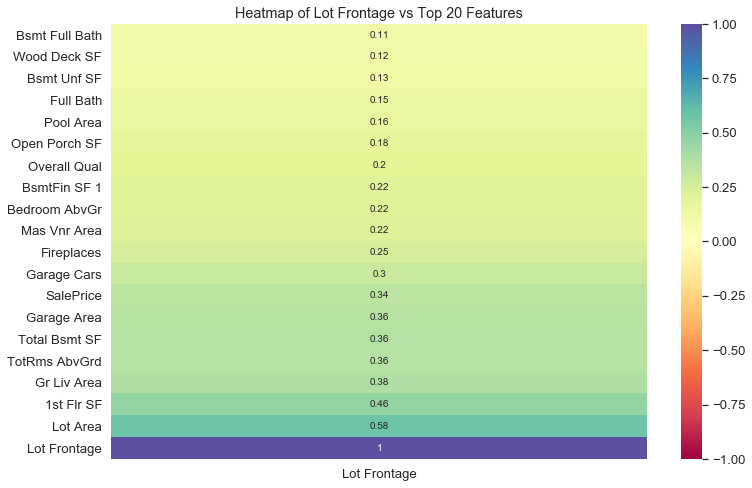

In [36]:
# Apply heatmap to view top features to use for regression
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Lot Frontage vs Top 20 Features')
sns.heatmap(train.corr()[['Lot Frontage']].sort_values('Lot Frontage').tail(20),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

In [37]:
# Assign imputation feature names and ensure there are no null values
lf_imputation_features = ['Lot Area','1st Flr SF','Gr Liv Area','TotRms AbvGrd','Total Bsmt SF','Garage Area','Garage Cars']
train[lf_imputation_features].isnull().sum()

Lot Area         0
1st Flr SF       0
Gr Liv Area      0
TotRms AbvGrd    0
Total Bsmt SF    0
Garage Area      0
Garage Cars      0
dtype: int64

In [38]:
# Assign new dataframe for regression
lf_imputation_df = train[['Lot Area','1st Flr SF','Gr Liv Area','TotRms AbvGrd',\
                          'Total Bsmt SF','Garage Area','Garage Cars','Lot Frontage']]

In [39]:
# Splitting train and test sets
lf_imputation_test = lf_imputation_df[lf_imputation_df['Lot Frontage'].isnull()]
lf_imputation_train = lf_imputation_df[lf_imputation_df['Lot Frontage'].notnull()]

In [40]:
# Setting features and target
lf_X = lf_imputation_train[lf_imputation_features]
lf_y = lf_imputation_train['Lot Frontage']
lf_test = lf_imputation_test[lf_imputation_features]

In [41]:
# Create train/test splits
lf_X_train, lf_X_valid, lf_y_train, lf_y_valid = train_test_split(
    lf_X,
    lf_y,
    test_size=0.3,
    random_state=42
)

In [42]:
lf_X_train

,Lot Area,1st Flr SF,Gr Liv Area,TotRms AbvGrd,Total Bsmt SF,Garage Area,Garage Cars
857,11767,1560,1560,7,1150.0,313.0,1.0
1619,10134,735,1034,5,735.0,240.0,1.0
1047,8480,970,970,5,970.0,624.0,2.0
1812,12128,1313,2559,9,868.0,506.0,2.0
394,11340,1246,2290,11,777.0,560.0,2.0
...,...,...,...,...,...,...,...
1349,8385,1664,1664,10,1664.0,616.0,2.0
1547,8987,1595,1595,6,1595.0,880.0,3.0
1026,8660,928,2168,11,760.0,576.0,2.0
1747,11075,1092,2112,9,952.0,576.0,2.0


In [43]:
# Scale our data.
sc = StandardScaler()
lf_Ztrain = sc.fit_transform(lf_X_train)
lf_Zvalid = sc.transform(lf_X_valid)
lf_Ztest = sc.transform(lf_test)

In [44]:
# Assigning LinearRegression model
lf_ols = LinearRegression()
lf_ols.fit(lf_Ztrain, lf_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# View R2 of model
print(lf_ols.score(lf_Ztrain, lf_y_train))
print(lf_ols.score(lf_Zvalid, lf_y_valid))

0.40502022251900976
0.4104140961338325


In [46]:
# View RMSE of model
print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(lf_y_train, lf_ols.predict(lf_Ztrain)))))
print("Validation RMSE(LR) " + str(np.sqrt(mean_squared_error(lf_y_valid, lf_ols.predict(lf_Zvalid)))))

Training RMSE(LR) 18.7120625413166
Validation RMSE(LR) 15.819186544360011


In [47]:
# Predict values for imputation
lf_predicted = [int(round(i)) for i in lf_ols.predict(lf_Ztest)]

In [48]:
# Obtain index number for imputation
lf_index = train[train['Lot Frontage'].isnull()]['Lot Frontage'].index

In [49]:
# Combine observed and imputed values
new_lf_series = []
n = 0
for i in range(2051):
    if (i == 616)|(i == 1327)|(i == 1712):
        new_lf_series.append(np.nan)
    elif i in lf_index:
        new_lf_series.append(lf_predicted[n])
        n += 1
    else:
        new_lf_series.append(lf_y[i])

In [50]:
# Imputing predicted values
train['Lot Frontage'] = pd.Series(new_lf_series)

In [51]:
# Check for null values
train['Lot Frontage'].isnull().sum()

0

In [52]:
# Check to see if data has been saved correctly
new_train['Lot Frontage'][2048] == train['Lot Frontage'][2048]

True

In [53]:
# Double check to see if data has been saved correctly
new_train['Lot Frontage'][1] == train['Lot Frontage'][1]

True


---


##### 1.4.2b Garage Yr Blt
[*Jump to table of contents*](#Contents)

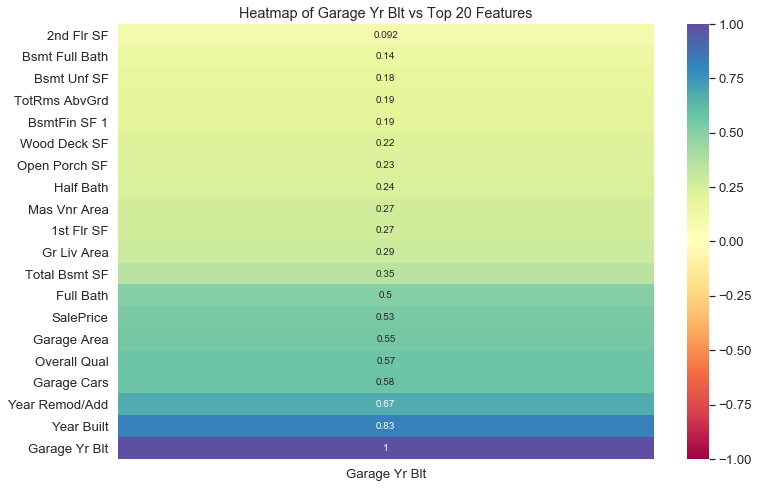

In [54]:
# Apply heatmap to view top features to use for regression
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Garage Yr Blt vs Top 20 Features')
sns.heatmap(train.corr()[['Garage Yr Blt']].sort_values('Garage Yr Blt').tail(20),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

In [55]:
# Assign imputation feature names and ensure there are no null values
gyb_features = ['Full Bath', 'Garage Area', 'Overall Qual', 'Garage Cars',\
                'Year Remod/Add', 'Year Built']
train[gyb_features].isnull().sum()

Full Bath         0
Garage Area       0
Overall Qual      0
Garage Cars       0
Year Remod/Add    0
Year Built        0
dtype: int64

In [56]:
# Assign new dataframe for regression 
gyb_df = train[['Full Bath', 'Garage Area', 'Overall Qual', 'Garage Cars',\
       'Year Remod/Add', 'Year Built', 'Garage Yr Blt']]

In [57]:
# Splitting train and test sets
gyb_test = gyb_df[gyb_df['Garage Yr Blt'].isnull()]
gyb_train = gyb_df[gyb_df['Garage Yr Blt'].notnull()]

In [58]:
# Setting features and target
gyb_X = gyb_train[gyb_features]
gyb_y = gyb_train['Garage Yr Blt']
gyb_test = gyb_test[gyb_features]

In [59]:
# Create train/test splits.
gyb_X_train, gyb_X_valid, gyb_y_train, gyb_y_valid = train_test_split(
    gyb_X,
    gyb_y,
    test_size=0.3,
    random_state=42
)

In [60]:
# Scale our data.
sc = StandardScaler()
gyb_Ztrain = sc.fit_transform(gyb_X_train)
gyb_Zvalid = sc.transform(gyb_X_valid)
gyb_Ztest = sc.transform(gyb_test)

In [61]:
# Assigning LinearRegression model
ols = LinearRegression()
ols.fit(gyb_Ztrain, gyb_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Display R2 score
print(ols.score(gyb_Ztrain, gyb_y_train))
print(ols.score(gyb_Zvalid, gyb_y_valid))

0.7385890360349926
0.7536992207035702


In [63]:
# Disply RMSE
print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(gyb_y_train, ols.predict(gyb_Ztrain)))))
print("Validation RMSE(LR) " + str(np.sqrt(mean_squared_error(gyb_y_valid, ols.predict(gyb_Zvalid)))))

Training RMSE(LR) 12.991456175002542
Validation RMSE(LR) 12.634793273456062


In [64]:
# Save predicted values
gyb_predicted = [int(round(i)) for i in ols.predict(gyb_Ztest)]

In [65]:
# Obtain index of null values
gyb_index = train[train['Garage Yr Blt'].isnull()]['Garage Yr Blt'].index

In [66]:
# Combine imputed and observed values
new_gyb_series = []
n = 0
for i in range(2051):
    if (i == 616)|(i == 1327)|(i == 1712):
        new_gyb_series.append(np.nan)
    elif i in gyb_index:
        new_gyb_series.append(gyb_predicted[n])
        n += 1
    else:
        new_gyb_series.append(gyb_y[i])

In [67]:
# Imputing predicted values
train['Garage Yr Blt'] = pd.Series(new_gyb_series)

In [68]:
# View null values
train['Garage Yr Blt'].isnull().sum()

0

In [69]:
# Check if values have bee imputed correctly
new_train['Garage Yr Blt'][2048] == train['Garage Yr Blt'][2048]

True

In [70]:
# Double check if values have been imputed correctly
new_train['Garage Yr Blt'][0] == train['Garage Yr Blt'][0]

True


---


##### 1.4.2c Mas Vnr Area
[*Jump to table of contents*](#Contents)

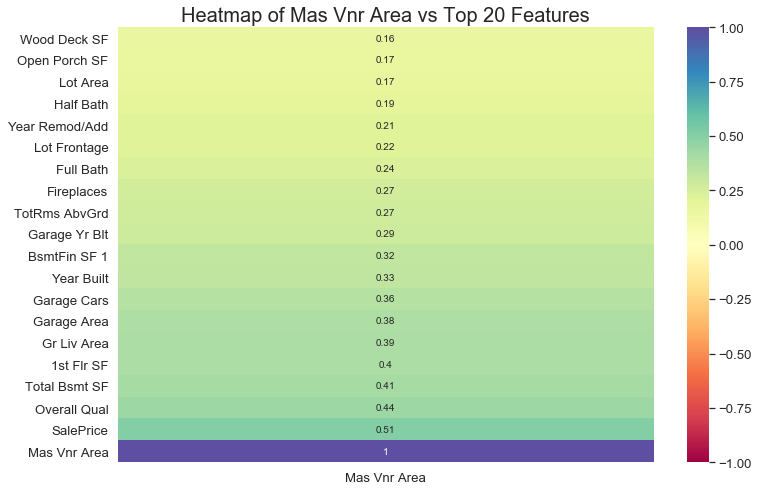

In [71]:
# Apply heatmap to view top features to use for regression
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Mas Vnr Area vs Top 20 Features', fontsize = 20)
sns.heatmap(train.corr()[['Mas Vnr Area']].sort_values('Mas Vnr Area').tail(20),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

In [72]:
# Assign imputation feature names and ensure there are no null values
mva_features = ['BsmtFin SF 1', 'Year Built', 'Garage Cars', 'Garage Area',\
       'Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'Overall Qual']
train[mva_features].isnull().sum()

BsmtFin SF 1     0
Year Built       0
Garage Cars      0
Garage Area      0
Gr Liv Area      0
1st Flr SF       0
Total Bsmt SF    0
Overall Qual     0
dtype: int64

In [73]:
# Assign new dataframe for regression 
mva_df = train[['BsmtFin SF 1', 'Year Built', 'Garage Cars', 'Garage Area',\
       'Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'Overall Qual', 'Mas Vnr Area']]

In [74]:
# Splitting train and test sets
mva_test = mva_df[mva_df['Mas Vnr Area'].isnull()]
mva_train = mva_df[mva_df['Mas Vnr Area'].notnull()]

In [75]:
# Setting features and target
mva_X = mva_train[mva_features]
mva_y = mva_train['Mas Vnr Area']
mva_test = mva_test[mva_features]

In [76]:
# Create train/test splits.
mva_X_train, mva_X_valid, mva_y_train, mva_y_valid = train_test_split(
    mva_X,
    mva_y,
    test_size=0.3,
    random_state=42
)

In [77]:
# Scale our data.
sc = StandardScaler()
mva_Ztrain = sc.fit_transform(mva_X_train)
mva_Zvalid = sc.transform(mva_X_valid)
mva_Ztest = sc.transform(mva_test)

In [78]:
# Assigning LinearRegression model
ols = LinearRegression()
ols.fit(mva_Ztrain, mva_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Display R2 score
print(ols.score(mva_Ztrain, mva_y_train))
print(ols.score(mva_Zvalid, mva_y_valid))

0.27225438901012156
0.27727480022742135


In [80]:
# Disply RMSE
print("Training RMSE(LR) " + str(np.sqrt(mean_squared_error(mva_y_train, ols.predict(mva_Ztrain)))))
print("Validation RMSE(LR) " + str(np.sqrt(mean_squared_error(mva_y_valid, ols.predict(mva_Zvalid)))))

Training RMSE(LR) 147.23990502124582
Validation RMSE(LR) 153.33620722920006


In [81]:
# Save predicted values
mva_predicted = [int(round(i)) for i in ols.predict(mva_Ztest)]

In [82]:
# Obtain index of null values
mva_index = train[train['Mas Vnr Area'].isnull()]['Mas Vnr Area'].index

In [83]:
# Combine imputed and observed values
new_mva_series = []
n = 0
for i in range(2051):
    if (i == 616)|(i == 1327)|(i == 1712):
        new_mva_series.append(np.nan)
    elif i in mva_index:
        new_mva_series.append(mva_predicted[n])
        n += 1
    else:
        new_mva_series.append(mva_y[i])

In [84]:
# Imputing predicted values
train['Mas Vnr Area'] = pd.Series(new_mva_series)

In [85]:
# View null values
train['Mas Vnr Area'].isnull().sum()

0

In [86]:
# Check if values have bee imputed correctly
new_train['Mas Vnr Area'][2048] == train['Mas Vnr Area'][2048]

True

In [87]:
# Double check if values have been imputed correctly
new_train['Mas Vnr Area'][0] == train['Mas Vnr Area'][0]

True

In [88]:
# Check if there are any null values left in train dataset.
train.isnull().sum().sum()

0

All null values have been handled in the train dataset.

---


The majority of imputation done was actually from the feature not existing in the observation. Apart from that, the feature with the highest number of imputations was 'Lot Frontage' with around 15% of observations that needed imputation. 

With regards to data leakage our final model will be applied on the entire train dataset, for which no data leakage will occur. There may be some slight data leakage when we split our train data into train and validation sets. However, It will not be significant as did not impute very many observations and are working with quite a number of features.


---


### 1.5 Mapping of Ordinal Data
[*Jump to table of contents*](#Contents)

There are a number of features that will have to be mapped as integers as the data is ordinal. 

These features are: 'Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', and 'Pool QC'.

In [89]:
# Creating list of ordinal variables
ordinal_var = ['Lot Shape', 'Utilities', 'Land Slope', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Kitchen Qual',
       'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC']
train[ordinal_var].head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC
0,IR1,AllPub,Gtl,Gd,TA,TA,TA,No,GLQ,Unf,Ex,Gd,Typ,None,RFn,TA,TA,Y,None
1,IR1,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,TA,RFn,TA,TA,Y,None
2,Reg,AllPub,Gtl,TA,Gd,TA,TA,No,GLQ,Unf,TA,Gd,Typ,None,Unf,TA,TA,Y,None
3,Reg,AllPub,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Gd,TA,Typ,None,Fin,TA,TA,Y,None
4,IR1,AllPub,Gtl,TA,TA,Fa,Gd,No,Unf,Unf,TA,TA,Typ,None,Unf,TA,TA,N,None


In [90]:
# Creating 'ordinal_dictionary' consisting of key value pairs mapping the column name to a dictionary.
# The inside dictionary maps each ordinal category in the column to an integer that represents its value.
ordinal_dict = {
    
    # General shape of property.
    'Lot Shape':{ 
        'IR3':3, # Irregular
        'IR2':2, # Moderately Irregular
        'IR1':1, # Slightly irregular
        'Reg':0  # Regular
    },
    
    # Type of utilities available.
    'Utilities':{ 
        'AllPub':4, # AllPub All public Utilities (E,G,W,& S)
        'NoSewr':3, # Electricity, Gas, and Water (Septic Tank)
        'NoSeWa':2, # Electricity and Gas Only
        'ELO':1     # Electricity only
    },
    
    # Slope of property.
    'Land Slope':{
        'Sev':3, # Severe Slope
        'Mod':2, # Moderate Slope
        'Gtl':1  # Gentle slope
    },
    
    # Exterior material quality.
    'Exter Qual':{
        'Ex':4, # Excellent
        'Gd':3, # Good
        'TA':2, # Average/Typical
        'Fa':1, # Fair
        'Po':0 # Poor
    },
    
    # Present condition of the material on the exterior.
    'Exter Cond':{
        'Ex':4, # Excellent
        'Gd':3, # Good
        'TA':2, # Average/Typical
        'Fa':1, # Fair
        'Po':0  # Poor
    },
    
    # Height of the basement.
    'Bsmt Qual':{
        'Ex':5,   # Excellent (100+ inches)
        'Gd':4,   # Good (90-99 inches)
        'TA':3,   # Average/Typical (80-89 inches)
        'Fa':2,   # Fair (70-79 inches)
        'Po':1,   # Poor (<70 inches)
        'None':0  # No basement
    },
    
    # General condition of the basement.
    'Bsmt Cond':{
        'Ex':5,  # Excellent
        'Gd':4,  # Good
        'TA':3,  # Typical - slight dampness allowed
        'Fa':2,  # Fair - dampness or some cracking or settling
        'Po':1,  # Poor - severe cracking, settling, or wetness
        'None':0 # No basement
    },
    
    # Walkout or garden level basement walls.
    'Bsmt Exposure':{
        'Gd':4,   # Good exposure
        'Av':3,   # Average exposure
        'Mn':2,   # Minimum exposure
        'No':1,   # No exposure
        'None':0  # No basement
    },
    
    # Quality of basement finished area.
    'BsmtFin Type 1':{
        'GLQ':6,   # Good Living Quarters
        'ALQ':5,   # Average Living Quarters
        'BLQ':4,   # Below average Living Quarters
        'Rec':3,   # Average Rec Room
        'LwQ':2,   # Low Quality
        'Unf':1,   # Unfinished
        'None':0   # No basement
    },
    
    # Quality of second finished area (if present)
    'BsmtFin Type 2':{
        'GLQ':6,   # Good Living Quarters
        'ALQ':5,   # Average Living Quarters
        'BLQ':4,   # Below average Living Quarters
        'Rec':3,   # Average Rec Room
        'LwQ':2,   # Low Quality
        'Unf':1,   # Unfinished
        'None':0   # No basement
    },
    
    # Heating quality and condition.
    'Heating QC':{
        'Ex':5, # Excellent
        'Gd':4, # Good
        'TA':3, # Average/Typical
        'Fa':2, # Fair
        'Po':1  # Poor
    },
    
    # Kitchen quality.
    'Kitchen Qual':{
        'Ex':5, # Excellent
        'Gd':4, # Good
        'TA':3, # Average/Typical
        'Fa':2, # Fair
        'Po':1  # Poor        
    },
    
    # Home functionality rating.
    'Functional':{
        'Typ':7,  # Typical Functionality
        'Min1':6, # Minor Deductions 1
        'Min2':5, # Minor Deductions 2
        'Mod':4,  # Moderate Deductions
        'Maj1':3, # Major Deductions 1
        'Maj2':2, # Major Deductions 2
        'Sev':1,  # Severely Damaged
        'Sal':0   # Salvage only
    },
    
    # Fireplace quality.
    'Fireplace Qu':{
        'Ex':5, # Excellent - Exceptional Masonry Fireplace
        'Gd':4, # Good - Masonry Fireplace in main level
        'TA':3, # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
        'Fa':2, # Fair - Prefabricated Fireplace in basement
        'Po':1, # Poor - Ben Franklin Stove
        'None':0 # NA - No Fireplace
    },
    
    # Interior finish of the garage.
    'Garage Finish':{
        'Fin':3,  # Finished
        'RFn':2,  # Rough Finished
        'Unf':1,  # Unfinished
        'None':0  # No Garage
    },
    
    # Garage Quality.
    'Garage Qual':{
        'Ex':5,  # Excellent
        'Gd':4,  # Good
        'TA':3,  # Average/Typical
        'Fa':2,  # Fair
        'Po':1,   # Poor   
        'None':0 # No Garage
    },
    
    # Garage condition.
    'Garage Cond':{
        'Ex':5,  # Excellent
        'Gd':4,  # Good
        'TA':3,  # Average/Typical
        'Fa':2,  # Fair
        'Po':1,  # Poor  
        'None':0 # No Garage
    },
    
    # Paved driveway.
    'Paved Drive':{
        'Y':2, # Paved
        'P':1, # Partial Pavement
        'N':0  # Dirt/Gravel
    },
    
    # Pool quality.
    'Pool QC':{
        'Ex':5,  # Excellent
        'Gd':4,  # Good
        'TA':3,  # Average/Typical
        'Fa':2,  # Fair
        'Po':1,  # Poor
        'None':0 # No Pool
    }
    
}

In [91]:
# Print out any values that exist in train but do not exist in the dictionary
for column in ordinal_dict:
    for cat in train[column].unique():
        if (cat in ordinal_dict[column].keys()):
            pass
        else:
            print(column, cat)

In [92]:
# Iterate over the train dataset to map the values.
for column in ordinal_dict:
    for cat in ordinal_dict[column]:
        train[column] = train[column].replace(cat,ordinal_dict[column][cat])

In [93]:
# View first five rows of columns in ordinal_var
train[ordinal_var].head()

,Lot Shape,Utilities,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC
0,1,4,1,3,2,3,3,1,6,1,5,4,7,0,2,3,3,2,0
1,1,4,1,3,2,4,3,1,6,1,5,4,7,3,2,3,3,2,0
2,0,4,1,2,3,3,3,1,6,1,3,4,7,0,1,3,3,2,0
3,0,4,1,2,2,4,3,1,1,1,4,3,7,0,3,3,3,2,0
4,1,4,1,2,2,2,4,1,1,1,3,3,7,0,1,3,3,0,0


In [94]:
# View dtypes of ordinal_var
train[ordinal_var].dtypes

Lot Shape         int64
Utilities         int64
Land Slope        int64
Exter Qual        int64
Exter Cond        int64
Bsmt Qual         int64
Bsmt Cond         int64
Bsmt Exposure     int64
BsmtFin Type 1    int64
BsmtFin Type 2    int64
Heating QC        int64
Kitchen Qual      int64
Functional        int64
Fireplace Qu      int64
Garage Finish     int64
Garage Qual       int64
Garage Cond       int64
Paved Drive       int64
Pool QC           int64
dtype: object

All ordinal values have been appropriately mapped.


---


### 1.6 Standardizing Column Names
[*Jump to table of contents*](#Contents)

Standardizing column names have been done at the end of data cleaning to differentiate between data that has been cleaned and has not been cleaned.

In [95]:
# Removing case and spaces from column names
train.columns = train.columns.str.lower().str.replace(' ','_')

In [96]:
# Display column names
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [97]:
# Creating new list of column names for ordinal variables based on old list
ordinal_var_new = []
for column in ordinal_var:
    ordinal_var_new.append(column.replace(' ','_').lower())

In [98]:
# Creating new list of column names for numerical variables based on:
# - 'train' columns that are not of type 'object'
# - column names that are not in 'ordinal_var-new'
numerical_var_new = []
for column in train.dtypes[train.dtypes != 'object'].index:
    if column in ordinal_var_new:
        pass
    else:
        numerical_var_new.append(column)

In [99]:
# Creating new list of nominal variables based on dtype
nominal_var_new = []
for column in train.dtypes[train.dtypes == 'object'].index:
    nominal_var_new.append(column)

In [100]:
# Check if length of all newly created lists match the length of 'train' columns
(len(ordinal_var_new) + len(numerical_var_new) + len(nominal_var_new)) == (len(train.columns))

True


---


## 2. EDA
[*Jump to table of contents*](#Contents)

We will be conducting EDA seperately for ordinal, nominal, and numerical data.

In [101]:
# function declaration of 'multiple_countplot', used to plot a number of countplots
def multiple_countplot(df, columns, wrap, percent = 0, title = ''):
    """ 
    multiple_countplot is used to apply countplots to a set of columns.
    
    input: df, columns, wrap, percent = 0
    
    df: The dataframe you want to plot from.
    columns: The column names of the categorical variables to plot.
    wrap: Determines the orientation of the subplots.
    percent: Used to plot a % line. The default percentage value of 0 will not plot any line.
    """
    data = pd.melt(df, value_vars=columns)
    g = sns.FacetGrid(data, col='variable', col_wrap=wrap, sharex=False, sharey=True)
    plt.xticks(rotation='vertical')
    g = g.map(sns.countplot, 'value', order=None, palette = 'tab10')
    [plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
    if percent != 0:
        [plt.setp(ax.axhline(percent*df.shape[0]), ls='--', color = 'crimson') for ax in g.axes.flat]
    g.fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize = 20)
    g.set()
    plt.show()

In [102]:
# function declaration of 'multiple_countplot', used to plot a number of countplots
def multiple_dist(df, columns, wrap, percent = 0, yshare = False, title = ''):
    """ 
    multiple_dist is used to apply distplots to a set of columns.
    
    input: df, columns, wrap, percent = 0, yshare = False
    
    df: The dataframe you want to plot from.
    columns: The column names of the categorical variables to plot.
    wrap: Determines the orientation of the subplots.
    percent: Used to plot a % line. The default percentage value of 0 will not plot any line.
    yshare: Boolean of whether or not to share y-axis between plots.
    """
    data = pd.melt(df, value_vars=columns)
    g = sns.FacetGrid(data, col='variable', col_wrap=wrap, sharex=False, sharey=yshare)
    
    plt.xticks(rotation='vertical')
    g = g.map(sns.distplot, 'value', kde = False, color = '#3274A1', hist_kws=dict(alpha=1))
    [plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
    if percent != 0:
        [plt.setp(ax.axhline(percent*df.shape[0]), ls='--', color = 'crimson') for ax in g.axes.flat]
    g.fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(title, fontsize = 20)
    plt.show()


---


### 2.1 EDA - Numerical
[*Jump to table of contents*](#Contents)

As we have quite a number of numerical features, we will be breaking up the analysis into bite-sized chunks. We will also be setting a threshold of 80% of observed values. This threshold is used because if 80% of a features observations are in one category/number, it is unlikely that we will gain any valuable information from that fetaure.

In [103]:
# Calculating threshold of observations at 80%
threshold = train.shape[0]* 0.8

In [104]:
# Creating list of features within threshold and above threshold
numerical_above_threshold = []
numerical_within_threshold = []
for column in numerical_var_new:
    if train[column].value_counts().sort_values(ascending = False).values[0] > threshold:
        numerical_above_threshold.append(column)
    else:
        numerical_within_threshold.append(column)

In [105]:
# Checking if feature lists match up with original feature list
len(numerical_within_threshold) + len(numerical_above_threshold) == len(numerical_var_new)

True

#### 2.1.1 Numerical Above Threshold
[*Jump to table of contents*](#Contents)

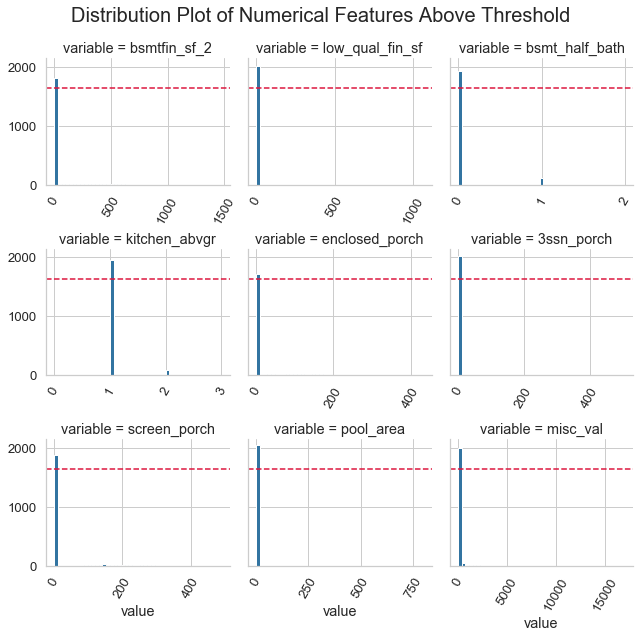

In [106]:
# Plotting distributions of numerical features above threshold of 80%
multiple_dist(train, numerical_above_threshold, 3, 0.8, True, \
              'Distribution Plot of Numerical Features Above Threshold')

The histograms above reflect numerical features that have 80% or more of values situated in one number. The 80% line has been plot as a dotted red line. We are unlikely to receive meaningful information from these features.

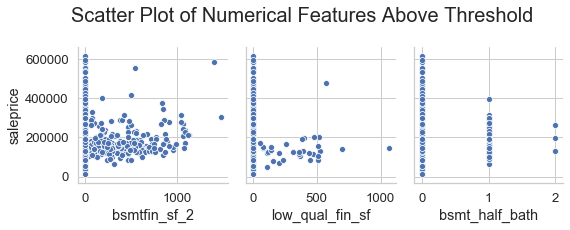

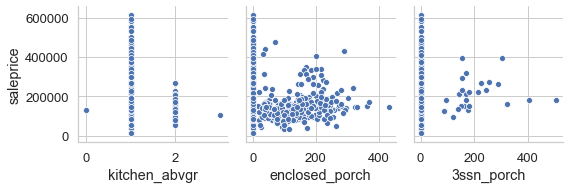

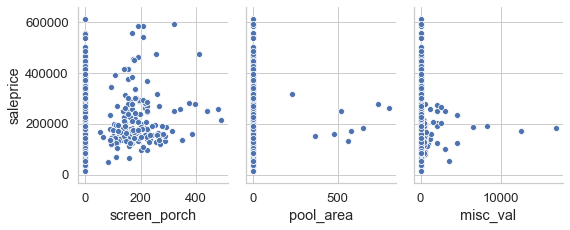

In [107]:
# Plotting scatter plot of numerical features within threshold of 80%
g = sns.pairplot(train, x_vars = numerical_above_threshold[:3], y_vars = 'saleprice')
sns.pairplot(train, x_vars = numerical_above_threshold[3:6], y_vars = 'saleprice');
sns.pairplot(train, x_vars = numerical_above_threshold[6:], y_vars = 'saleprice');
plt.subplots_adjust(top=1.2)
g.fig.suptitle("Scatter Plot of Numerical Features Above Threshold", y=1.2, fontsize = 20);

From the scatterplots, we can see that saleprice doesn't correlate to many of these values.

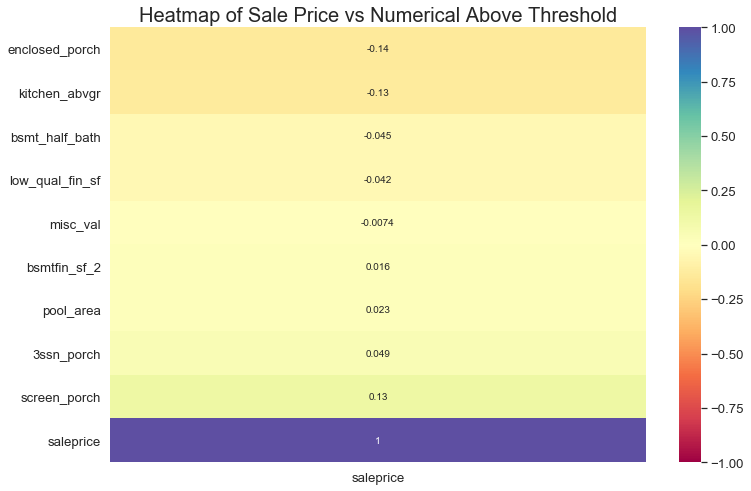

In [108]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Numerical Above Threshold', fontsize = 20)
sns.heatmap(train[numerical_above_threshold+['saleprice']].corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

As expected, these features have very low correlation with 'saleprice'

---


#### 2.1.2a Numerical Within Threshold 1
[*Jump to table of contents*](#Contents)

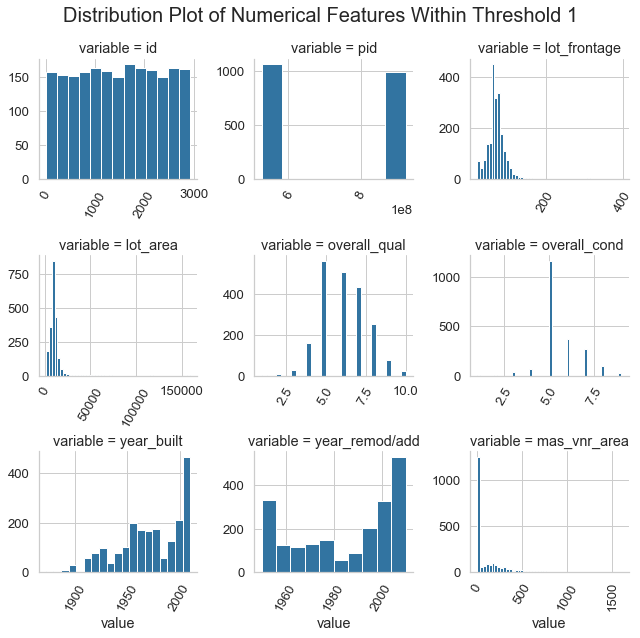

In [109]:
# Plotting distribution of first nine features in 'numerical_within_threshold'
multiple_dist(train, numerical_within_threshold[:9], 3, yshare = False,\
              title = 'Distribution Plot of Numerical Features Within Threshold 1')

The ID and PID features are unlikely to tell us anything about 'saleprice', however keeping one of them may be useful to track the observations. All other features are likely to give us useful information about 'saleprice', with the exception of 'mas_vnr_area'. 'mas_vnr_area' seems to have many observations at 0.

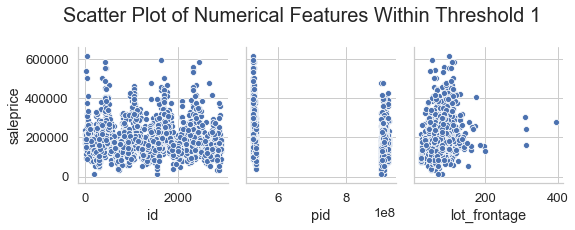

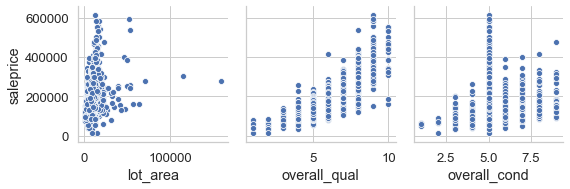

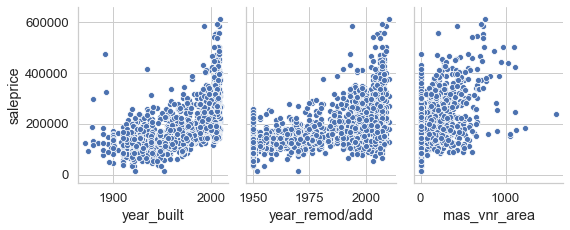

In [110]:
# Plotting scatter plot of first nine numerical features within threshold vs 'saleprice'
g = sns.pairplot(train, x_vars = numerical_within_threshold[:3], y_vars = 'saleprice');
sns.pairplot(train, x_vars = numerical_within_threshold[3:6], y_vars = 'saleprice');
sns.pairplot(train, x_vars = numerical_within_threshold[6:9], y_vars = 'saleprice');
plt.subplots_adjust(top=1.2)
g.fig.suptitle("Scatter Plot of Numerical Features Within Threshold 1", y=1.2, fontsize = 20);

It appears that 'overal_quality' holds the most promise out of these nine features in giving us information about 'saleprice'.

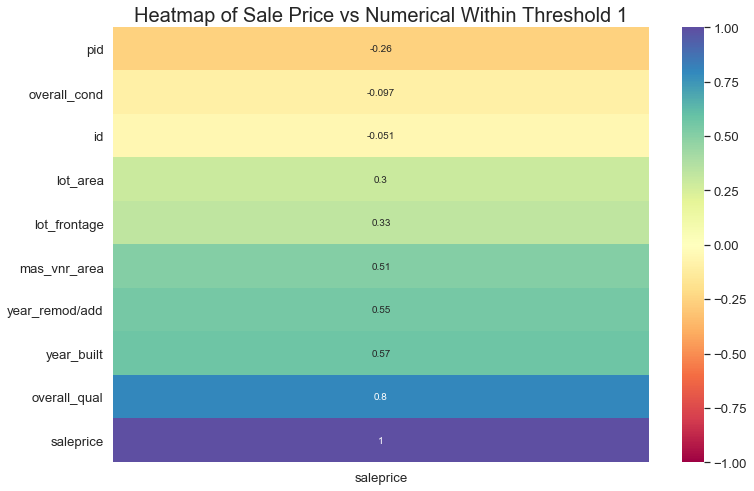

In [111]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Numerical Within Threshold 1', fontsize = 20)
sns.heatmap(train[numerical_within_threshold[:9]+['saleprice']].corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

As expected, 'overall_qual' has high correlation with 'saleprice'

---


#### 2.1.2b Numerical Within Threshold 2
[*Jump to table of contents*](#Contents)

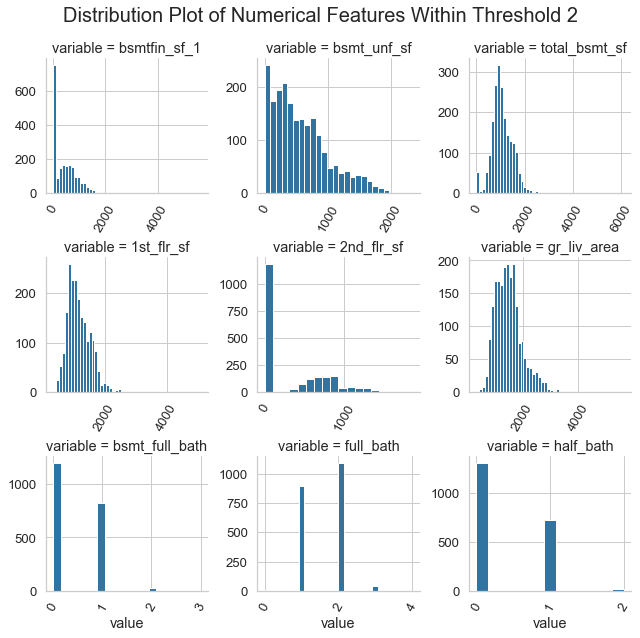

In [112]:
# Plotting distribution of second set of nine features in 'numerical_within_threshold'
multiple_dist(train, numerical_within_threshold[9:18], 3, yshare = False,\
             title = 'Distribution Plot of Numerical Features Within Threshold 2')

From this group of nine, it is unlikely that 'bsmtfin_sf_1' and '2nd_flr_sf' will give us information about 'saleprice'.

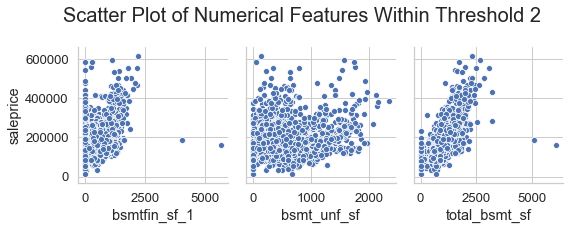

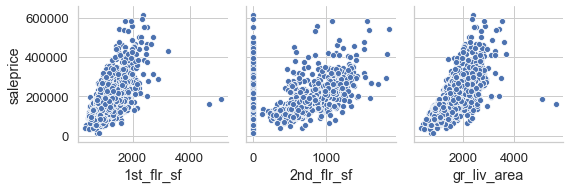

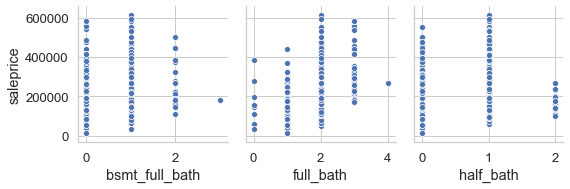

In [113]:
# Plotting scatter plot of second set of nine numerical features within threshold vs 'saleprice'
g = sns.pairplot(train, x_vars = numerical_within_threshold[9:12], y_vars = 'saleprice');
sns.pairplot(train, x_vars = numerical_within_threshold[12:15], y_vars = 'saleprice');
sns.pairplot(train, x_vars = numerical_within_threshold[15:18], y_vars = 'saleprice');
g.fig.suptitle("Scatter Plot of Numerical Features Within Threshold 2", y=1.2, fontsize = 20);

From this group of nine features, it appears that 'total_bsmt_sf', 'gr_liv_area', and '1st_flr_sf' are the three features that are most likely to help us predict 'saleprice'.

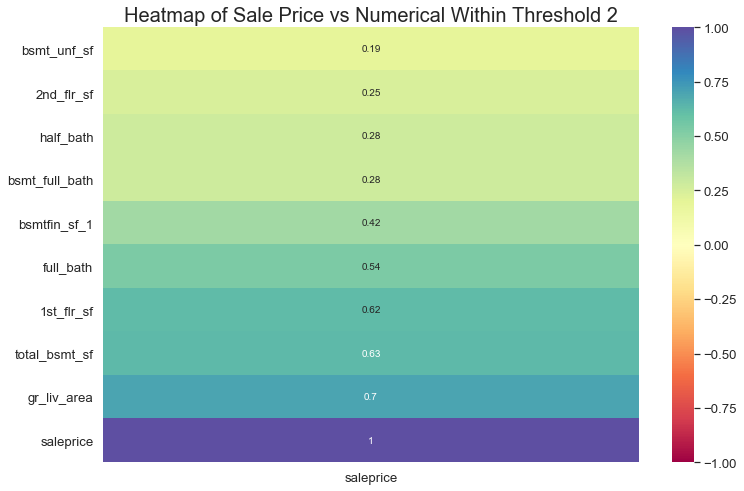

In [114]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Numerical Within Threshold 2', fontsize = 20)
sns.heatmap(train[numerical_within_threshold[9:18]+['saleprice']].corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

As expected, 'total_bsmt_sf', 'gr_liv_area', and '1st_flr_sf' have the highest correlation with 'saleprice'.

#### 2.1.2c Numerical Within Threshold 3
[*Jump to table of contents*](#Contents)

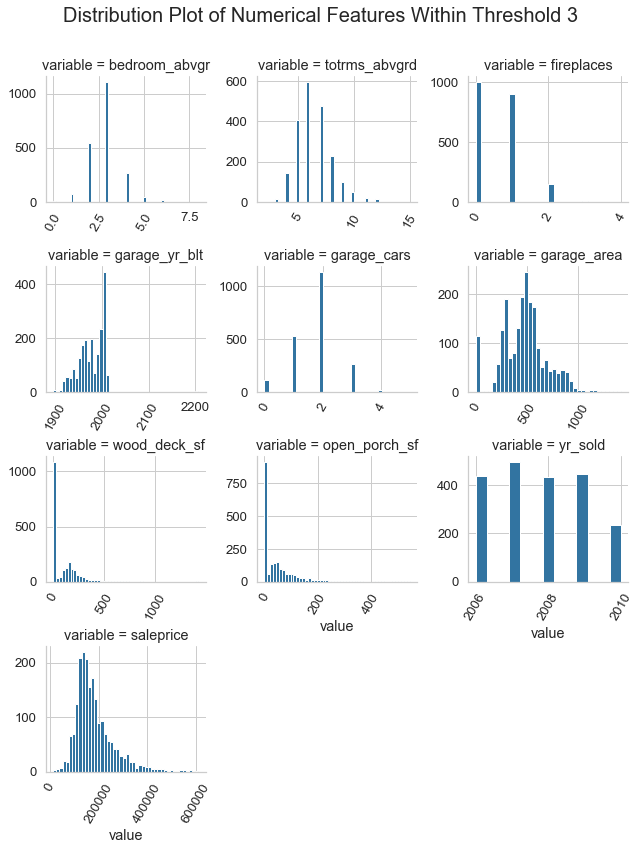

In [115]:
# Plotting distribution of remaining features in 'numerical_within_threshold'
multiple_dist(train, numerical_within_threshold[18:], 3, yshare = False,\
             title = 'Distribution Plot of Numerical Features Within Threshold 3')

From the distribution, it appears that 'wood_deck_sf' and 'open_porch_sf' is unlikely to help us predict 'saleprice'.

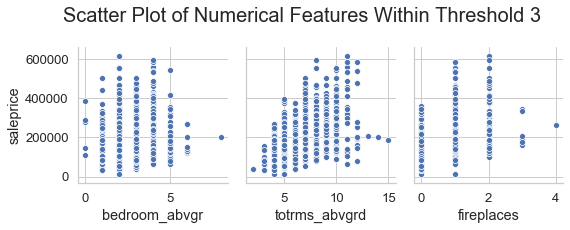

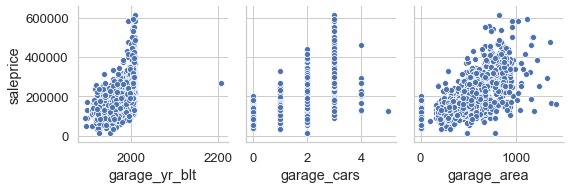

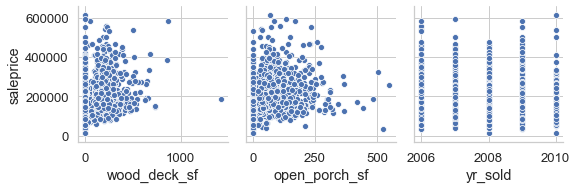

In [116]:
# Plotting scatter plot of remaining numerical features within threshold vs 'saleprice'
g = sns.pairplot(train, x_vars = numerical_within_threshold[18:21], y_vars = 'saleprice');
sns.pairplot(train, x_vars = numerical_within_threshold[21:24], y_vars = 'saleprice');
sns.pairplot(train, x_vars = numerical_within_threshold[24:-1], y_vars = 'saleprice');
g.fig.suptitle("Scatter Plot of Numerical Features Within Threshold 3", y=1.2, fontsize = 20);

From the scatterplots, it appears that 'totrms_abvgrd' is likely to help us predict 'saleprice'.

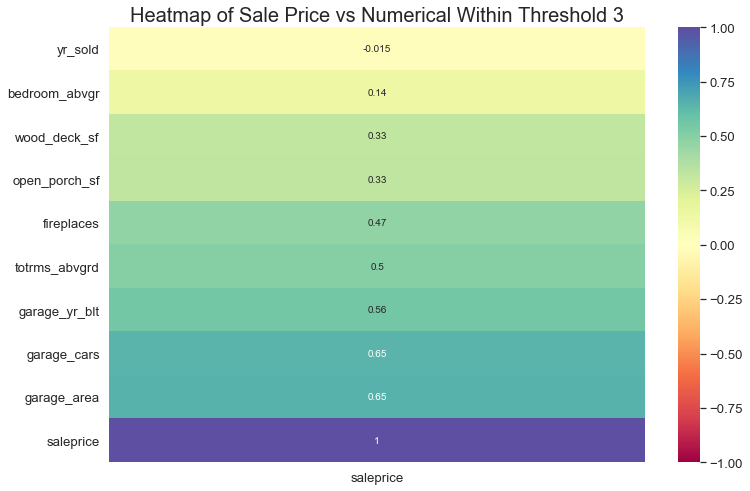

In [117]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Numerical Within Threshold 3', fontsize = 20)
sns.heatmap(train[numerical_within_threshold[18:]].corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

Unexpectedly, 'garage_cars' and 'garage_area' have the highest correlation with 'saleprice'.

---


### 2.2 EDA - Ordinal
[*Jump to table of contents*](#Contents)

In [118]:
# Creating list of features within threshold and above threshold
ordinal_above_threshold = []
ordinal_within_threshold = []
for column in ordinal_var_new:
    if train[column].value_counts().sort_values(ascending = False).values[0] > threshold:
        ordinal_above_threshold.append(column)
    else:
        ordinal_within_threshold.append(column)

In [119]:
# Check to see if list lengths align
len(ordinal_above_threshold) + len(ordinal_within_threshold) == len(ordinal_var_new)

True

#### 2.2.1 Ordinal Above Threshold
[*Jump to table of contents*](#Contents)

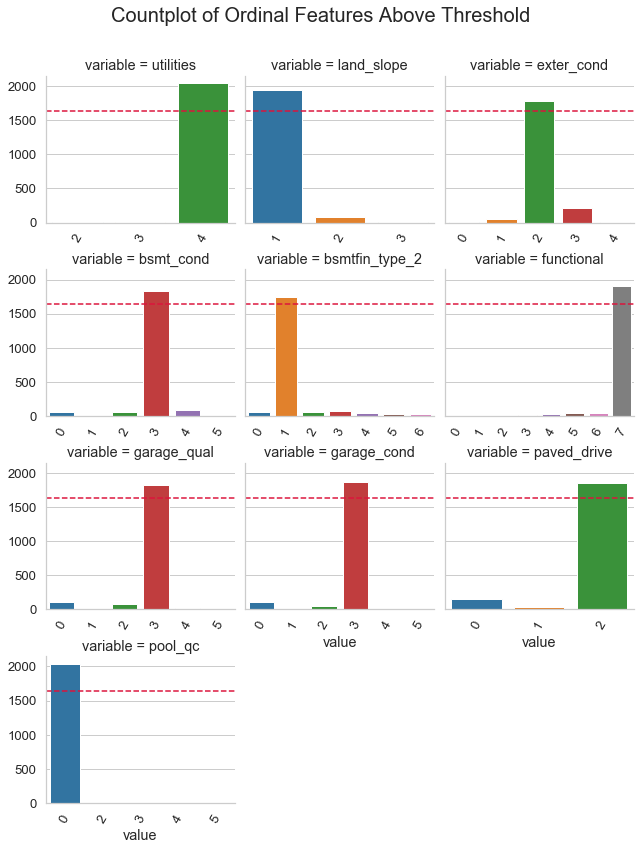

In [120]:
# Plot countplots of oridnal features above threshold
multiple_countplot(train, ordinal_above_threshold, 3, percent = 0.8,\
                   title = 'Countplot of Ordinal Features Above Threshold')

As these features all exceeed the threshold of 80%, it is unlikely that any of these features will help us to predict 'saleprice'.

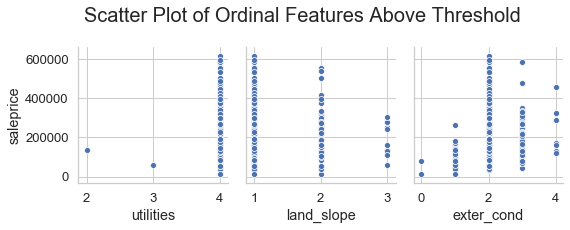

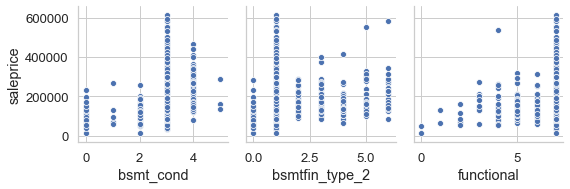

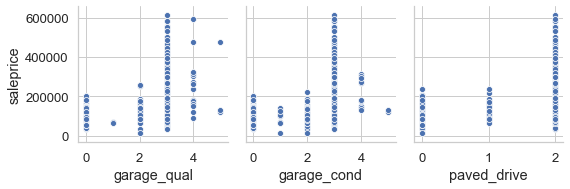

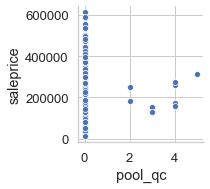

In [121]:
# Plotting scatter plot of ordinal features above threshold vs 'saleprice'
g = sns.pairplot(train, x_vars = ordinal_above_threshold[:3], y_vars = 'saleprice');
sns.pairplot(train, x_vars = ordinal_above_threshold[3:6], y_vars = 'saleprice');
sns.pairplot(train, x_vars = ordinal_above_threshold[6:9], y_vars = 'saleprice');
sns.pairplot(train, x_vars = ordinal_above_threshold[9:], y_vars = 'saleprice');
g.fig.suptitle("Scatter Plot of Ordinal Features Above Threshold", y=1.2, fontsize = 20);

Although some of these features look promising, there are just too many values in one category making it unlikely for there to be a high correlation with 'saleprice'.

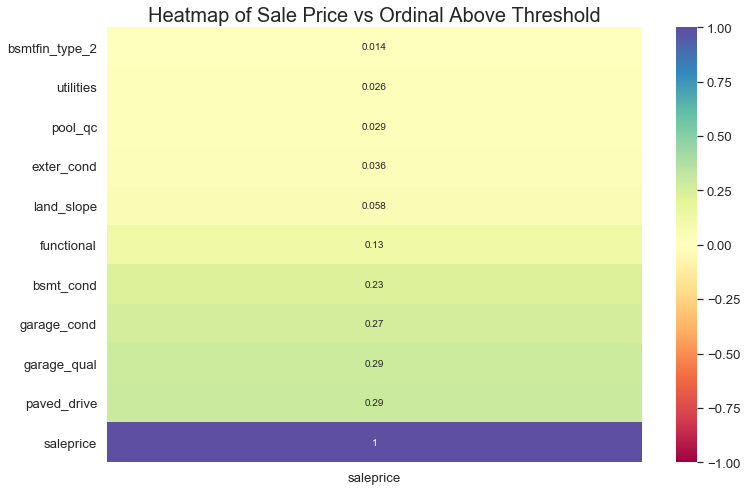

In [122]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Ordinal Above Threshold', fontsize = 20)
sns.heatmap(train[ordinal_above_threshold+['saleprice']].corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

As expected, correlation is low for all of these features.

---


#### 2.2.2 Ordinal Within Threshold
[*Jump to table of contents*](#Contents)

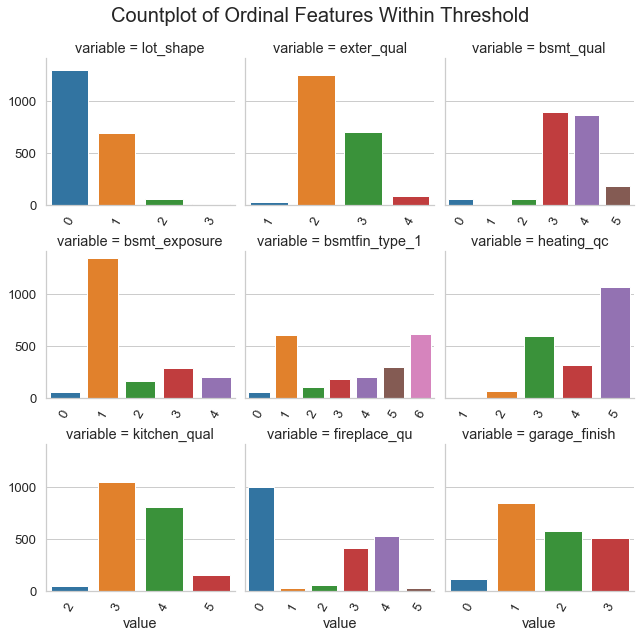

In [123]:
# Plot countplots of ordinal features within threshold
multiple_countplot(train, ordinal_within_threshold, 3,\
                   title = 'Countplot of Ordinal Features Within Threshold')

Of these features, 'bsmt_exposure' is the most unlikely feature to help us predict 'saleprice'.

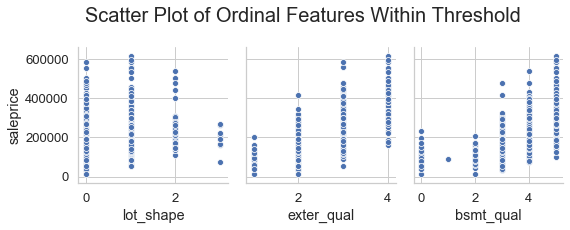

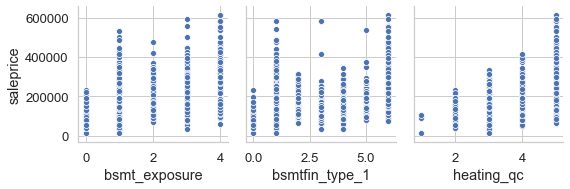

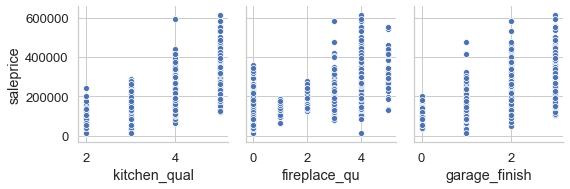

In [124]:
# Plotting scatter plot of ordinal features within threshold vs 'saleprice'
g = sns.pairplot(train, x_vars = ordinal_within_threshold[:3], y_vars = 'saleprice');
sns.pairplot(train, x_vars = ordinal_within_threshold[3:6], y_vars = 'saleprice');
sns.pairplot(train, x_vars = ordinal_within_threshold[6:], y_vars = 'saleprice');
g.fig.suptitle("Scatter Plot of Ordinal Features Within Threshold", y=1.2, fontsize = 20);

Of these features, 'exter_qual' and 'kitchen_qual' seem to be the most promising.

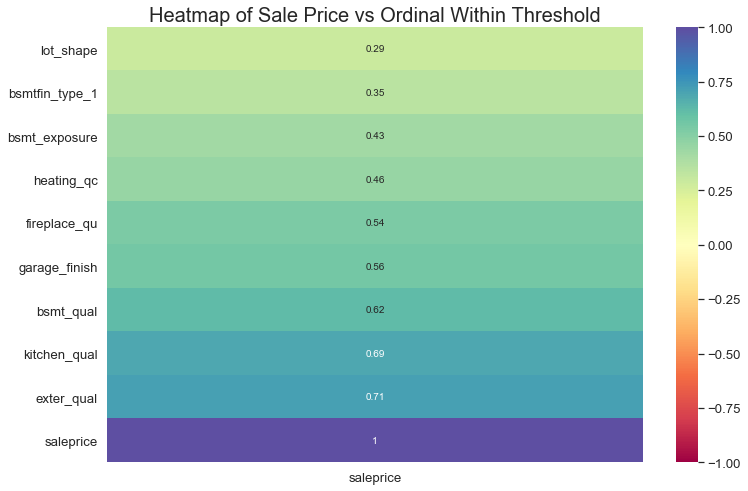

In [125]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,8)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Ordinal Within Threshold', fontsize = 20)
sns.heatmap(train[ordinal_within_threshold+['saleprice']].corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

As expected, 'exter_qual' and 'kitchen_qual' have the highest correlation with 'saleprice'.

---


### 2.3 EDA - Nominal
[*Jump to table of contents*](#Contents)

In [126]:
# Creating list of features within threshold and above threshold
nominal_above_threshold = []
nominal_within_threshold = []
for column in nominal_var_new:
    if train[column].value_counts().sort_values(ascending = False).values[0] > threshold:
        nominal_above_threshold.append(column)
    else:
        nominal_within_threshold.append(column)

In [127]:
# Check if list lengths align
len(nominal_above_threshold) + len(nominal_within_threshold) == len(nominal_var_new)

True

#### 2.3.1 Nominal Above Threshold
[*Jump to table of contents*](#Contents)

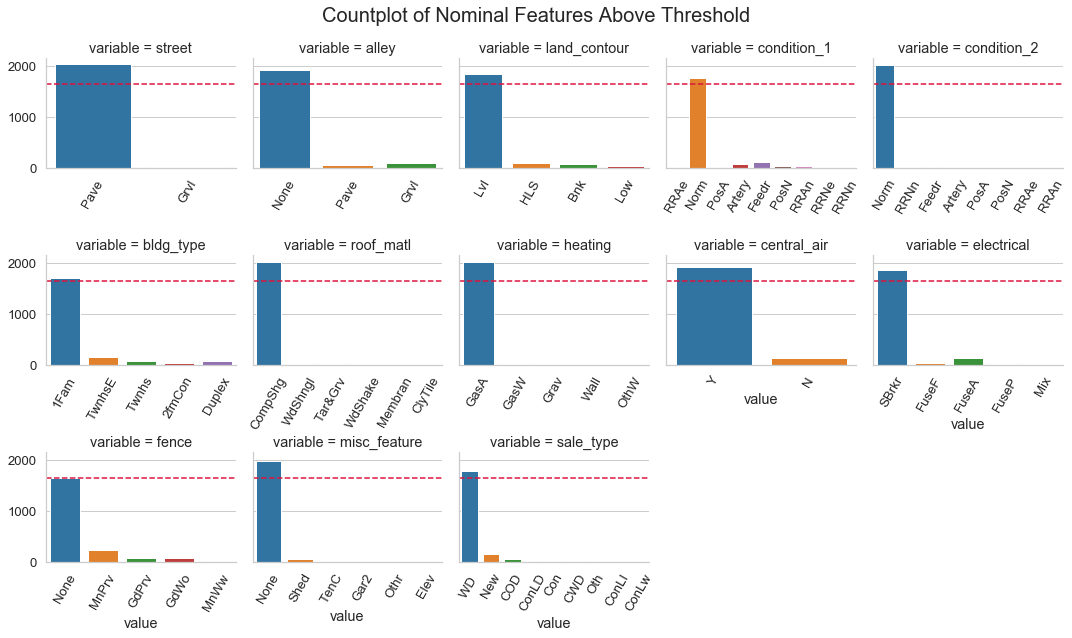

In [128]:
# Plot countplots of nominal features above threshold
multiple_countplot(train, nominal_above_threshold, 5, percent = 0.8,
                  title = 'Countplot of Nominal Features Above Threshold')

As these features exceeed the threshold of 80%, it is unlikely that any of them will help us to predict 'saleprice'.

---


#### 2.3.2 Nominal Within Threshold
[*Jump to table of contents*](#Contents)

As some of these features have a large number of unique values, we will split them up for plotting.

In [129]:
# Splitting up features with high number of unique values
nominal_within_threshold_wide = [column for column in nominal_within_threshold if len(train[column].unique())>=15]
nominal_within_threshold_narrow = [column for column in nominal_within_threshold if column not in nominal_within_threshold_wide]

In [130]:
# Checking to see if list lengths match
len(nominal_within_threshold_narrow) + len(nominal_within_threshold_wide) == len(nominal_within_threshold)

True

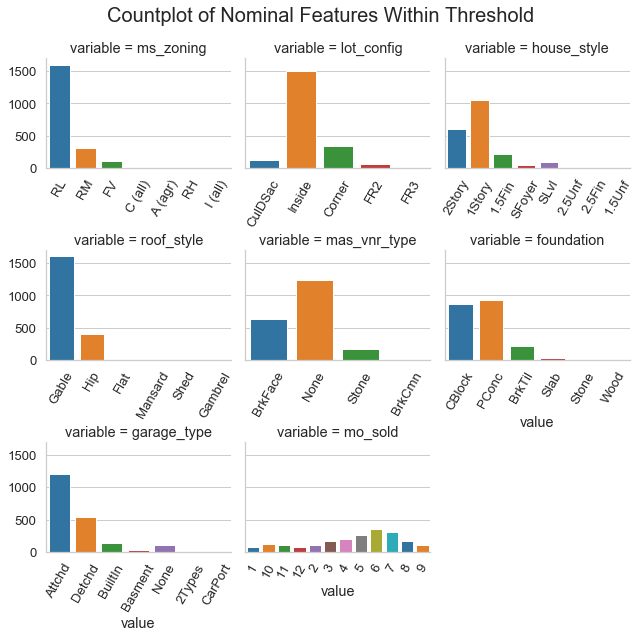

In [131]:
# Plot countplots of nominal features within threshold
multiple_countplot(train, nominal_within_threshold_narrow, 3,
                  title = 'Countplot of Nominal Features Within Threshold')

Of these features, 'mo_sold' is the most evenly distributed. For this reason, it is speculated that 'mo_sold' may give us insights into 'saleprice'.

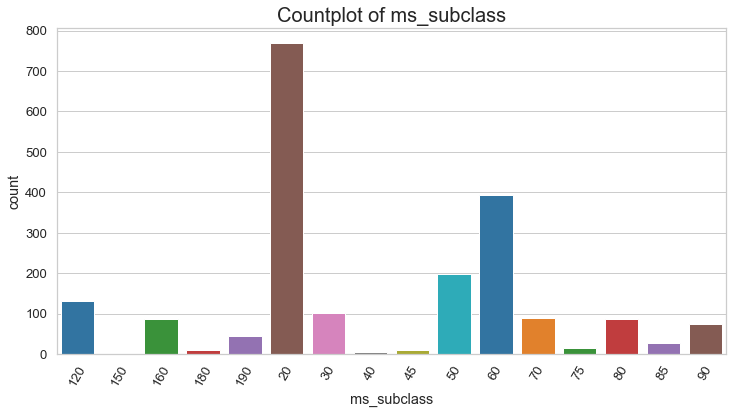

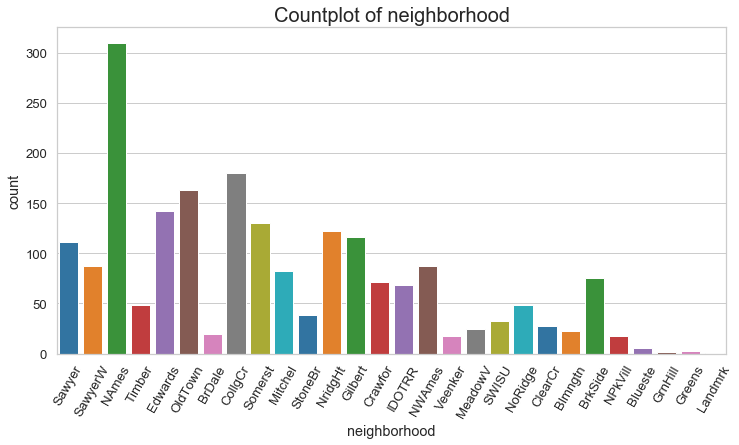

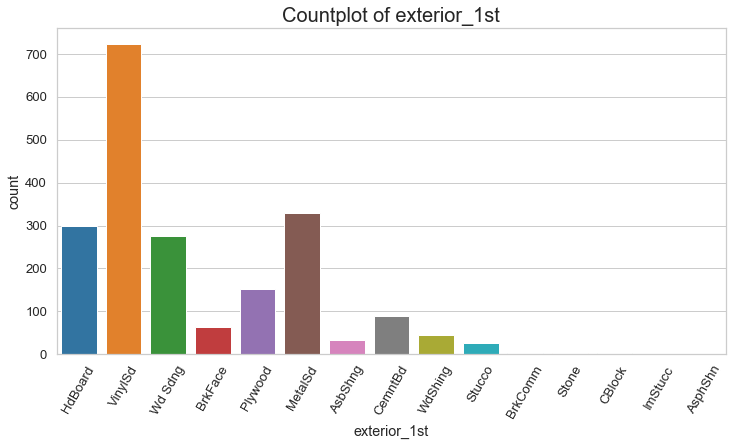

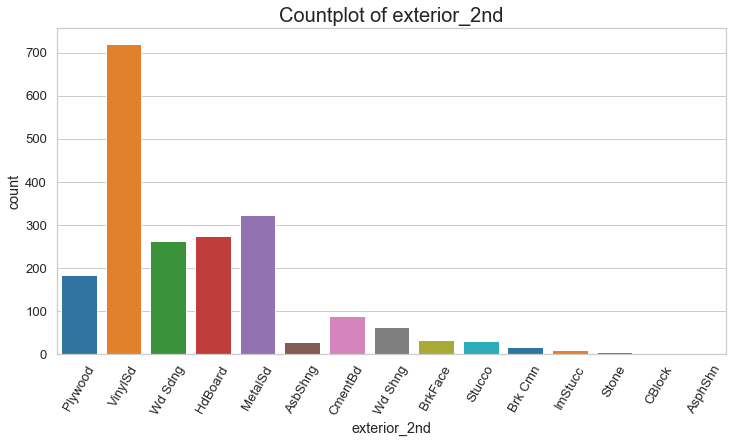

In [132]:
# Using iteration to plot countplot of features in 'nominal_within_threshold_wide'
for column in nominal_within_threshold_wide:
    fig, ax = plt.subplots(figsize=(12,6))
    plt.title('Countplot of '+column, fontsize = 20)
    sns.countplot(train[column], palette = 'tab10');
    plt.xticks(rotation=60)

These features may have to be binned in order to reduce the total number of features.

---


Although many of the features in this dataset is unlikely to give us useful information in predicting 'saleprice', we are fairly confident the remaining features will give us good results.

## 3. Feature Selection/Engineering
[*Jump to table of contents*](#Contents)

We will begin our feature selection by removing all features that exceed the 80% observation threshold. These features will be placed into a list consisting of features that we do not want to use.

In [133]:
# Creating a list of features to exclude from model
to_remove = []
to_remove.extend(numerical_above_threshold)
to_remove.extend(ordinal_above_threshold)
to_remove.extend(nominal_above_threshold)

In [134]:
# Creating a list of features to include in model
remaining_features = [column for column in train.columns if column not in to_remove]

In [135]:
# Creating a dataframe with dummy variables to include
train_dummies = pd.get_dummies(train[remaining_features])

In [136]:
# View shape of dataframe
train_dummies.shape

(2048, 166)

As we have too many features, we will remove features that have a absolute correlation with 'saleprice' of less than 0.1

### 3.1 Low Correlation With 'saleprice'
[*Jump to table of contents*](#Contents)

As features with an extremely low correlation with 'saleprice' are unlikely to help us predict 'saleprice', we will drop them.

In [137]:
# Creating a table with absolute value of correlation equal to or greater than 0.1
remaining_features = list(train_dummies.corr()[['saleprice']][np.abs(train_dummies.corr()['saleprice']) >= 0.1].index)

In [138]:
# Check number of remaining features
len(remaining_features)

85

In [139]:
# Reset the dataframe with dummy variables to include
train_dummies = train_dummies[remaining_features]

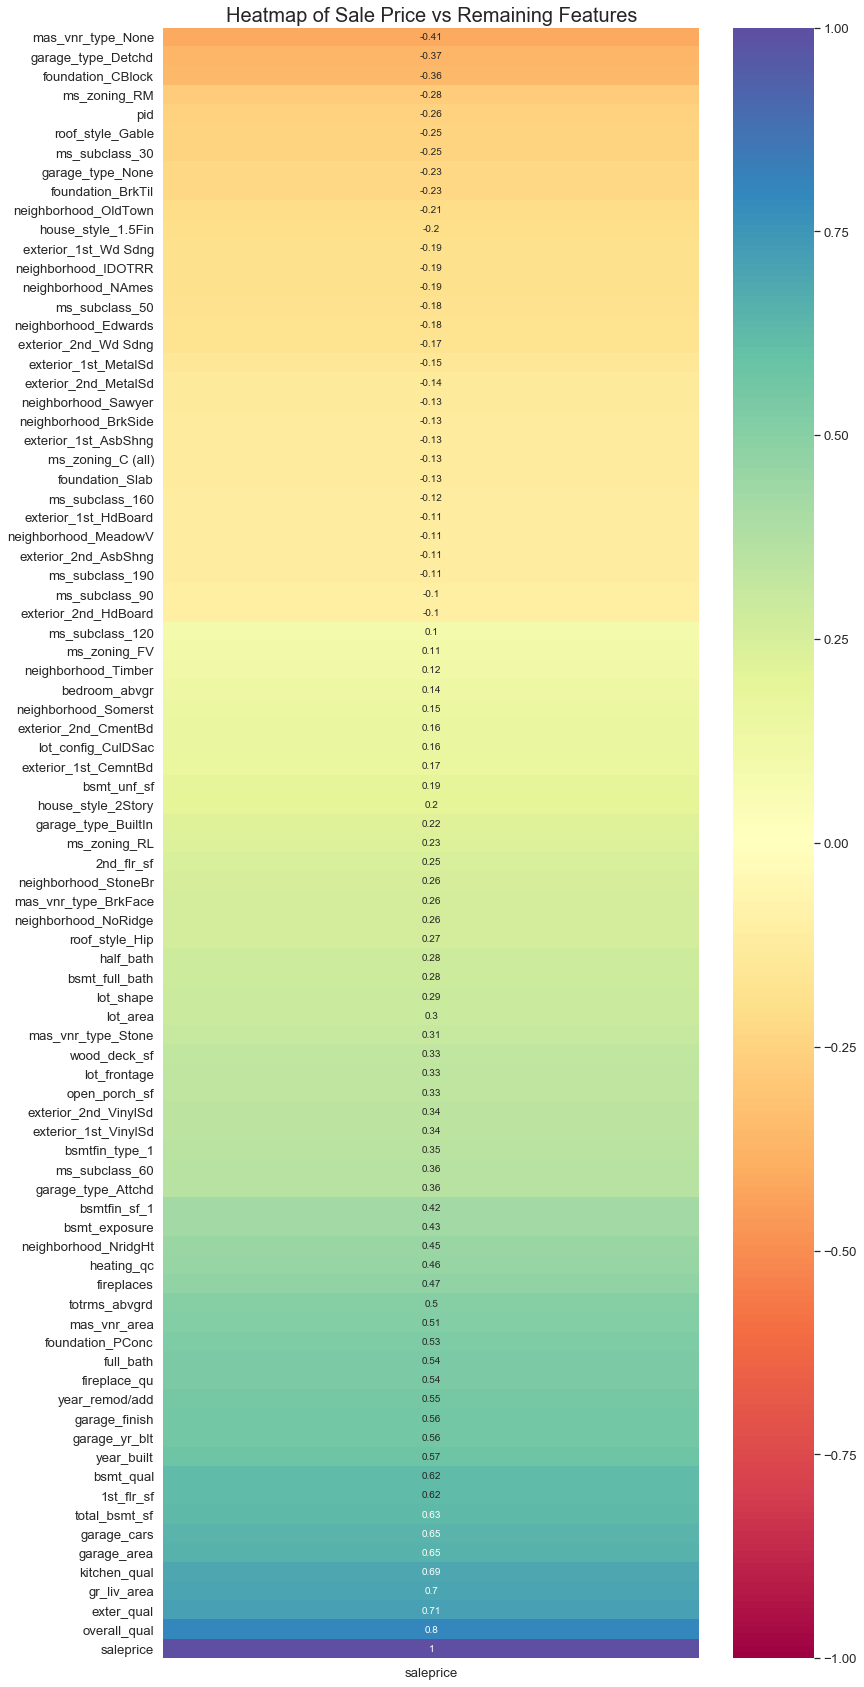

In [140]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,30)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Remaining Features', fontsize = 20)
sns.heatmap(train_dummies.corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

These values look promising, but to reduce multicolinearity we will iterate to remove highly correlated features.

---

### 3.2 Reduction of Multicollinearity
[*Jump to table of contents*](#Contents)

Although one of the assumptions of regression is that each feature is independent of each other. In the real world, this is impossible but we can try to reduce the amount of multicollinearity by removing features that are highly correlated with each other.

In [141]:
# Iterate on features 'train_dummies' in order of correlation with saleprice
# Removes highly correlated features with each feature
# Stores features to keep in 'to_keep', and features to drop in 'to_lose'
to_keep = []
to_lose = []
for feature in list(np.abs(train_dummies.corr()[['saleprice']]).sort_values('saleprice', ascending = False).index):
    if feature in to_lose or feature == 'saleprice':
        pass
    else:
        to_keep.append(feature)
        for inside_feature in list(train_dummies.corr()[feature][np.abs(train_dummies.corr()[feature]) >= 0.9].index):
            if inside_feature in to_keep:
                pass
            else:
                to_lose.append(inside_feature)
to_keep.append('saleprice')    

In [142]:
# Check number of features to keep
len(to_keep)

80

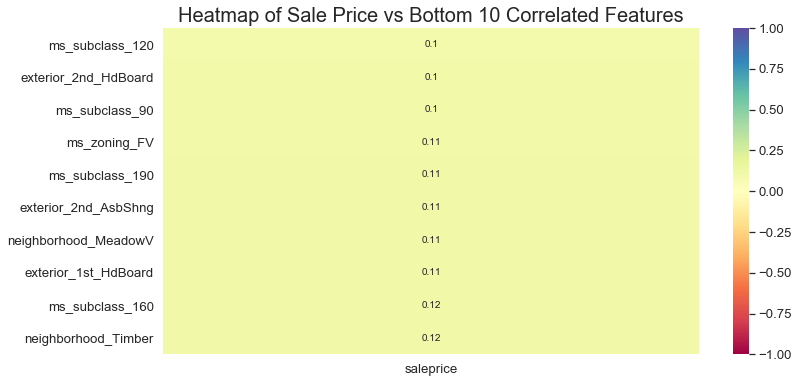

In [143]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,6)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Bottom 10 Correlated Features', fontsize = 20)
sns.heatmap(np.abs(train_dummies[to_keep].corr())[['saleprice']].sort_values('saleprice').head(10),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

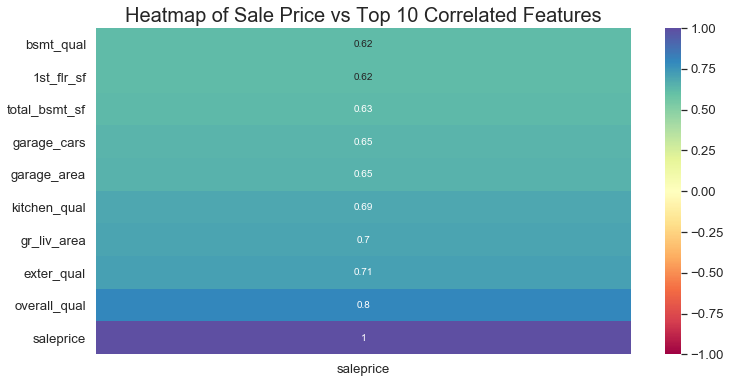

In [144]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,6)) # Using subplots to control figure size
plt.title('Heatmap of Sale Price vs Top 10 Correlated Features', fontsize = 20)
sns.heatmap(np.abs(train_dummies[to_keep].corr())[['saleprice']].sort_values('saleprice').tail(10),
            vmax=1, vmin=-1, cmap='Spectral', annot=True, ax=ax);

As we have a decently sized feature set, we will move onto model selection where we will further eliminate features and choose a regression model.


---


## 4. Model Selection
[*Jump to table of contents*](#Contents)

In this section we will be picking the top 25 to 30 features and then comparing different regression models, optimizing for lowest validation RMSE.

### 4.1 Baseline Model
[*Jump to table of contents*](#Contents)

In [145]:
# Function that calculates adjusted r2
def adjusted_r2(r2, n, k):
    """
    Function that calculates adjusted R2
    
    Inputs
    r2: Actual R2
    n: Number of observations
    k: Number of features
    
    Output: adjusted r2
    """
    num = (1-r2)*(n-1)
    den = (n-k-1)
    return(1-(num/den))

In [146]:
# Function to fit and print evaluations of OLS, lasso, ridge, and elastic net models.
# Funation also optimizes alpha up to 5 digits.
def evaluate_model(df, features, target, mask = False):
    """
    Function that fits and prints various metrics of OLS, lasso, ridge, and elastic net models.
    This function will also optimize alpha for up to 5 digits.
    
    Input
    df: dataframe to use for modelling.
    features: features that will go into the model.
    target: target to predict.
    mask: mask will determine if alpha iterations are printed.
    """
    # Create train test splits
    X  = df[features]
    y = df[target]
    X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                         y,
                                                         test_size = 0.3,
                                                         random_state = 42)
    
    # Scale features using standard scalar
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_valid_scaled = ss.transform(X_valid)
    
    # Loop through each model
    for model in ['OLS','Ridge','Lasso','Enet']:
        print(f"|----------{model}----------|")
        n0 = 0.1
        n1 = 10
        n2 = 200
        alpha_hold = 0
        condition = True
        
        # While condition will break when alpha is accurate to 5 digits
        while condition:
            if mask:
                print(f"Current alpha: {alpha_hold}")
            
            alpha_n = np.linspace(n0, n1, n2)
            
            if model == 'Lasso':
                modcv = LassoCV(alphas = alpha_n, max_iter = 1000000)
            elif model == 'Ridge':
                modcv = RidgeCV(alphas = alpha_n)
            elif model == 'Enet':
                modcv = ElasticNetCV(alphas = alpha_n, max_iter = 1000000)
            elif model == 'OLS':
                break
            modcv.fit(X_train, y_train)
            
            if alpha_hold == 0:
                alpha_hold = round(modcv.alpha_,5)
                new_n = np.where(alpha_n == modcv.alpha_)[0][0]
            else:
                if float(alpha_hold) == float(round(modcv.alpha_,5)):
                    #print("!!!!")
                    condition = False
                else:
                    alpha_hold = round(modcv.alpha_,5)
                    new_n = np.where(alpha_n == modcv.alpha_)[0][0]

            if new_n == 0:
                n0 = n0 / 2
                #print("one")
            elif new_n >= 199:
                n1 = n1 * 2
                #print("two")
            elif condition != False:
                n0 = alpha_n[new_n-1]
                n1 = alpha_n[new_n+1]
                #print("good")
            elif condition == False:
                print('Optimal alpha has been found accurate to 5 digits.')
                print('')

        
        
        if model == 'Lasso':
            mod = Lasso(alpha = alpha_hold, max_iter = 1000000)
        elif model == 'Ridge':
            mod = Ridge(alpha = alpha_hold)
        elif model == 'Enet':
            mod = ElasticNet(alpha = alpha_hold, max_iter = 1000000)
        elif model == 'OLS':
            mod = LinearRegression()
            
        # Fit and print metrics
        mod.fit(X_train_scaled, y_train)
        print(f"Results for {model} are as reflected below.")
        print(f"{model} Train R2 : {mod.score(X_train_scaled, y_train)}")
        print(f"{model} Test R2 : {mod.score(X_valid_scaled, y_valid)}")
        print(f"{model} Train Adjusted R2 : {adjusted_r2(mod.score(X_train_scaled, y_train),len(X_train_scaled),len(features))}")
        print(f"{model} Test Adjusted R2 : {adjusted_r2(mod.score(X_valid_scaled, y_valid),len(X_train_scaled),len(features))}")
        print(f"{model} Cross Validation : {cross_val_score(mod, X_train_scaled, y_train, cv=5)}")
        print(f"{model} Cross Validation Mean : {cross_val_score(mod, X_train_scaled, y_train, cv=5).mean()}")
        print(f"{model} Train RMSE : {np.sqrt(mean_squared_error(y_train, mod.predict(X_train_scaled)))}")
        print(f"{model} Test RMSE : {np.sqrt(mean_squared_error(y_valid, mod.predict(X_valid_scaled)))}")

Before we begin our model selection, we will first evaluate our baseline model.

In [147]:
evaluate_model(train_dummies, to_keep[:-1], 'saleprice', mask = False)

|----------OLS----------|
Results for OLS are as reflected below.
OLS Train R2 : 0.8696176345575737
OLS Test R2 : 0.8729680796656148
OLS Train Adjusted R2 : 0.8620047691695828
OLS Test Adjusted R2 : 0.8655508426320476
OLS Cross Validation : [0.84913632 0.79954916 0.86811502 0.77229787 0.87349925]
OLS Cross Validation Mean : 0.83251952356942
OLS Train RMSE : 28439.541886046765
OLS Test RMSE : 28617.47231189663
|----------Ridge----------|
Optimal alpha has been found accurate to 5 digits.

Results for Ridge are as reflected below.
Ridge Train R2 : 0.869614790184356
Ridge Test R2 : 0.8731473763587605
Ridge Train Adjusted R2 : 0.8620017587169236
Ridge Test Adjusted R2 : 0.8657406082378012
Ridge Cross Validation : [0.84936846 0.79993587 0.86817883 0.77252385 0.87361898]
Ridge Cross Validation Mean : 0.8327251976757415
Ridge Train RMSE : 28439.852097591913
Ridge Test RMSE : 28597.269397796084
|----------Lasso----------|
Optimal alpha has been found accurate to 5 digits.

Results for Lasso ar

Baseline metrics reflect that model performs quite well. R2 and R2 adjusted do not differ very much meaning that model is quite well fittted. RMSE is also quite similar across all models between train and test, indicating that the model is not overfitting. Although there is some slight variance in cross validation scores, but that is to be expected due to irreducible error.


---


### 4.2 Iterative Optimization of RMSE
[*Jump to table of contents*](#Contents)

In this section we will be selecting the top 25 to 30 features by iteratively building a set of 'optimal features' based on RMSE. Although we set an upper limit of 30 features, the function is written to remove features that are contributing to the reduction of RMSE.

In [148]:
# Function that calculates optimal set of features utilizing iteration
def combination_step(feature_list, df, max_size, model = 'ols', target = 'saleprice'):
    """
    'combination_step is a function that calculates optimal set of features utilizing iteration
    
    Input
    feature_list: List of features to iterate from
    df: Dataframe for modelling
    max_size: Maximum number of features
    model: Type of model to be used for modelling
           - 'ols' = LinearRegression()
           - 'lasso' = LassoCV()
           - 'ridge' = RidgeCV()
    target: Chosen target that we are trying to predict
    
    Output
    rmse: Lowest calculated RMSE
    optimal_features: List of features used to calculate RMSE
    
    The function works by:
    1.  Iterating over a given 'feature_list'
    2.  Adding feature into 'optimal_features'
    3.  Calculating RMSE
    4.  If RMSE is lower than 'rmse'
         4.1 'rmse' is replaced by RMSE
         4.2 feature name will be saved in 'to_append'
    5.  Feature is removed from 'optimal_features'
    6.  'feature_list' is iterated over again
    7.  Removing one feature from 'optimal_features'
    8.  Calculating RMSE
    9.  If RMSE is lower than 'rmse'
         9.1 'rmse' is replaced by RMSE
         9.2 feature name will be saved in 'to_remove'
    10. Feature is appended into 'optimal_features'
    11. If both 'to_append' and 'to_remove' are empty
         11.1 While loop will end
    12. Else if 'to_remove' is not empty
         12.1 feature name in 'to_remove' will be removed from 'optimal_features'
    13. Else if 'to_append' is not empty
         13.1 feature name in 'to_append' will be appended into 'optimal_features'
         13.2 feature name will not be appended if optimal_features is greater than 'max_size'
    """
    condition = True
    state = 1
    rmse = 1000000      # As we are trying to reduce RMSE, we have to start at a high rmse value
    new_to_keep = feature_list
    optimal_features = []
    y = df[target]
    
    # While loop that terminates when a lower RMSE cannot be found or max size is reached
    while condition:
        to_append = ''
        to_remove = ''

        # Iteration over list of features
        for feature in new_to_keep:
            # Skip if feature is already in 'optimal_features'
            if feature in optimal_features:
                pass
            else:
                # Append feature and model
                optimal_features.append(feature)
                X = df[optimal_features]
                y = df['saleprice']
                X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                                      y,
                                                                      test_size=0.3,
                                                                      random_state=42)
                ss = StandardScaler()
                ss.fit(X_train)

                X_train_scaled = ss.transform(X_train)
                X_valid_scaled = ss.transform(X_valid)
                
                # Appropriate model will be selected based on input string 'model'
                if model == 'ols':
                    mod = LinearRegression()
                elif model == 'lasso':
                    mod = LassoCV(alphas = np.logspace(0, 6, 200))
                elif model == 'ridge':
                    mod = RidgeCV(alphas = np.logspace(0, 6, 200))
                
                mod.fit(X_train_scaled, y_train)
                temprmse = np.sqrt(mean_squared_error(y_valid, mod.predict(X_valid_scaled)))
                
                # Remove feature from 'optimal_features'
                optimal_features.remove(feature)
                
                # If condition applied when lower rmse is found
                if rmse > temprmse:
                    rmse = temprmse
                    to_append = feature
                else:
                    pass

        # Ensuring that function does not attempt to iterate over empty list
        if len(optimal_features) > 1:
            # Iteration over list of features
            for feature in new_to_keep:
                # Skip if feature is not in 'optimal_features'
                if feature not in optimal_features:
                    pass
                else:
                    # Remove feature and model
                    optimal_features.remove(feature)
                    X = df[optimal_features]
                    y = df['saleprice']
                    X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                                          y,
                                                                          test_size=0.3,
                                                                          random_state=42)
                    ss = StandardScaler()
                    ss.fit(X_train)

                    X_train_scaled = ss.transform(X_train)
                    X_valid_scaled = ss.transform(X_valid)
                    
                    # Appropriate model will be selected based on input string 'model'
                    if model == 'ols':
                        mod = LinearRegression()
                    elif model == 'lasso':
                        mod = LassoCV(alphas = np.logspace(0, 6, 200))
                    elif model == 'ridge':
                        mod = RidgeCV(alphas = np.logspace(0, 6, 200))
                                      
                    mod.fit(X_train_scaled, y_train)
                    temprmse = np.sqrt(mean_squared_error(y_valid, mod.predict(X_valid_scaled)))
                    
                    # Add feature back in 'optimal_features'
                    optimal_features.append(feature)
                    
                    # If condition applied when lower rmse is found
                    if rmse > temprmse:
                        rmse = temprmse
                        to_remove = feature
                    else:
                        pass

        # If lower RMSE is not found, exit while loop
        if to_append == '' and to_remove == '':
            condition = False
            return([rmse, optimal_features])
            
        # Remove feature if lower RMSE was found by removing feature
        elif to_remove != '':
            optimal_features.remove(to_remove)
        
        # Append feature if lower RMSE was found by adding feature
        elif to_append != '' and len(optimal_features) < max_size:
            optimal_features.append(to_append)

In [149]:
# For loop that calls function for max_lenth values from 25 to 30 utilizing a linear regression model
rmse_ols = 1000000
optimal_ols = []
for max_length in range(25,31):
    rmse_temp, features_temp = combination_step(to_keep[:-1], train_dummies, max_length);
    if rmse_temp < rmse_ols:
        rmse_ols = rmse_temp
        optimal_ols = features_temp
print(f"Using LinearRegression, the lowest RMSE obtained was {round(rmse_ols,2)} utilzing {len(optimal_ols)} features.")
print('')
print(f"The features are: {', '.join(optimal_ols)}")

Using LinearRegression, the lowest RMSE obtained was 26945.73 utilzing 30 features.

The features are: overall_qual, exter_qual, gr_liv_area, kitchen_qual, garage_area, 1st_flr_sf, garage_finish, year_remod/add, mas_vnr_area, fireplaces, neighborhood_NridgHt, bsmt_exposure, bsmtfin_sf_1, mas_vnr_type_None, ms_subclass_60, bsmtfin_type_1, lot_frontage, lot_area, bsmt_full_bath, roof_style_Hip, neighborhood_NoRidge, neighborhood_StoneBr, garage_type_None, exterior_1st_Wd Sdng, exterior_2nd_Wd Sdng, neighborhood_Somerst, ms_subclass_160, ms_subclass_190, exterior_2nd_HdBoard, ms_subclass_120


In [150]:
# For loop that calls function for max_lenth values from 25 to 30 utilizing ridge regression model
rmse_ridge = 1000000
optimal_ridge = []
for max_length in range(25,31):
    rmse_temp, features_temp = combination_step(to_keep[:-1], train_dummies, max_length, model = 'ridge');
    if rmse_temp < rmse_ridge:
        rmse_ridge = rmse_temp
        optimal_ridge = features_temp
print(f"Using RidgeCV, the lowest RMSE obtained was {round(rmse_ridge,2)} utilzing {len(optimal_ridge)} features.")
print('')
print(f"The features are: {', '.join(optimal_ridge)}")

Using RidgeCV, the lowest RMSE obtained was 26998.6 utilzing 30 features.

The features are: overall_qual, exter_qual, gr_liv_area, kitchen_qual, garage_area, total_bsmt_sf, 1st_flr_sf, garage_finish, year_remod/add, mas_vnr_area, fireplaces, neighborhood_NridgHt, bsmt_exposure, bsmtfin_sf_1, ms_subclass_60, lot_area, bsmt_full_bath, roof_style_Hip, neighborhood_NoRidge, neighborhood_StoneBr, garage_type_None, house_style_2Story, exterior_1st_Wd Sdng, exterior_2nd_Wd Sdng, lot_config_CulDSac, neighborhood_Somerst, ms_subclass_160, exterior_1st_HdBoard, ms_subclass_90, ms_subclass_120


In [151]:
# For loop that calls function for max_lenth values from 25 to 30 utilizing a lasso regression model
rmse_lasso = 1000000
optimal_lasso = []
for max_length in range(25,31):
    rmse_temp, features_temp = combination_step(to_keep[:-1], train_dummies, max_length, model = 'lasso');
    if rmse_temp < rmse_lasso:
        rmse_lasso = rmse_temp
        optimal_lasso = features_temp
print(f"Using LassoCV, the lowest RMSE obtained was {round(rmse_lasso,2)} utilzing {len(optimal_lasso)} features.")
print('')
print(f"The features are: {', '.join(optimal_lasso)}")

Using LassoCV, the lowest RMSE obtained was 27087.63 utilzing 29 features.

The features are: overall_qual, exter_qual, gr_liv_area, kitchen_qual, garage_area, 1st_flr_sf, garage_finish, year_remod/add, mas_vnr_area, fireplaces, neighborhood_NridgHt, bsmt_exposure, bsmtfin_sf_1, ms_subclass_60, bsmtfin_type_1, lot_frontage, lot_area, bsmt_full_bath, roof_style_Hip, neighborhood_NoRidge, neighborhood_StoneBr, garage_type_None, house_style_2Story, exterior_1st_Wd Sdng, exterior_2nd_Wd Sdng, neighborhood_Somerst, ms_subclass_160, exterior_2nd_HdBoard, ms_subclass_120


All models seem to produce a better RMSE than the baseline model, indicating that a number of redundant features from the baseline model have been removed.


---


### 4.3 Regression Metrics Analysis
[*Jump to table of contents*](#Contents)

In this section we will be analysing various 'optimized' models in order to construct our final model.

In [152]:
# Check if optimal feature sets are the same
print(optimal_ols == optimal_ridge)
print(optimal_ols == optimal_lasso)
print(optimal_ridge == optimal_lasso)

False
False
False


In [153]:
# Iterate to find share features among all feature lists
optimal_all = []
combined_features = optimal_ols + optimal_ridge + optimal_lasso
for feature in combined_features:
    if (feature in optimal_ols) and (feature in optimal_ridge) and (feature in optimal_lasso):
        if feature not in optimal_all:
            optimal_all.append(feature)
    else:
        pass

In [154]:
# Check length of 'optimal_all'
len(optimal_all)

25

In [155]:
# Evaluate model with features 'optimal_all'
evaluate_model(train_dummies, optimal_all, 'saleprice', mask = False)

|----------OLS----------|
Results for OLS are as reflected below.
OLS Train R2 : 0.8474467064206281
OLS Test R2 : 0.88386176651521
OLS Train Adjusted R2 : 0.8447360935283152
OLS Test Adjusted R2 : 0.8817981873843501
OLS Cross Validation : [0.86972674 0.80323124 0.85697595 0.74699151 0.86956027]
OLS Cross Validation Mean : 0.8292971432000371
OLS Train RMSE : 30762.66545789639
OLS Test RMSE : 27362.92043334813
|----------Ridge----------|
Optimal alpha has been found accurate to 5 digits.

Results for Ridge are as reflected below.
Ridge Train R2 : 0.8474467016892355
Ridge Test R2 : 0.8838639872550227
Ridge Train Adjusted R2 : 0.8447360887128538
Ridge Test Adjusted R2 : 0.8818004475829371
Ridge Cross Validation : [0.86973157 0.80323073 0.85698399 0.74700236 0.8695673 ]
Ridge Cross Validation Mean : 0.8293031913654829
Ridge Train RMSE : 30762.665934943605
Ridge Test RMSE : 27362.65882175192
|----------Lasso----------|
Results for Lasso are as reflected below.
Lasso Train R2 : 0.847446706420

As these features are shared by all 'optimized' feature sets, it is likely that these 25 features are contributing the most to each 'optimized' model. 

We see that across each model train RMSE is around 10% higher than test RMSE, indicating that the feature set causes a slightly underfit (high bias, low variance) model.

As both adjusted R2 values are very close to both actual R2 values, we can infer that this feature set is not too excessive.

There is some slight variance with cross validation values, but that is to be expected due to irreducible error.

It is noted that across all models with this feature set all scores are extremely close. This indicates that the model is not overfit, as we are not getting a significantly better model with the regularized regression models (ridge, lasso, elastic net).

Overall this model performs very well, and is significantly better than the baseline model.


---


In [156]:
# Evaluate model with features 'optimal_ols'
evaluate_model(train_dummies, optimal_ols, 'saleprice', mask = False)

|----------OLS----------|
Results for OLS are as reflected below.
OLS Train R2 : 0.8508604823644869
OLS Test R2 : 0.8871194549162591
OLS Train Adjusted R2 : 0.8476691945406171
OLS Test Adjusted R2 : 0.8847040366905015
OLS Cross Validation : [0.8668238  0.79203595 0.85634447 0.74751219 0.87295375]
OLS Cross Validation Mean : 0.8271340316455857
OLS Train RMSE : 30416.520783268737
OLS Test RMSE : 26976.42459548855
|----------Ridge----------|
Results for Ridge are as reflected below.
Ridge Train R2 : 0.8508604823644869
Ridge Test R2 : 0.8871194550094251
Ridge Train Adjusted R2 : 0.8476691945406171
Ridge Test Adjusted R2 : 0.884704036785661
Ridge Cross Validation : [0.8668238  0.79203595 0.85634447 0.74751219 0.87295375]
Ridge Cross Validation Mean : 0.8271340322258798
Ridge Train RMSE : 30416.520783268734
Ridge Test RMSE : 26976.42458435604
|----------Lasso----------|
Results for Lasso are as reflected below.
Lasso Train R2 : 0.8508604823644869
Lasso Test R2 : 0.8871194548871281
Lasso Trai

These features were obtained using the function 'combination_step' utilizing linear regression.

We see that across each model train RMSE is around 10% higher than test RMSE, indicating that the feature set causes a slightly underfit (high bias, low variance) model.

As both adjusted R2 values are very close to both actual R2 values, we can infer that this feature set is not too excessive.

There is some slight variance with cross validation values, but that is to be expected due to irreducible error.

It is noted that across all models with this feature set all scores are extremely close. This indicates that the model is not overfit, as we are not getting a significantly better model with the regularized regression models (ridge, lasso, elastic net).

Overall this model performs very well, and is significantly better than the baseline model.


---


In [157]:
# Evaluate model with features 'optimal_ridge'
evaluate_model(train_dummies, optimal_ridge, 'saleprice', mask = False)

|----------OLS----------|
Results for OLS are as reflected below.
OLS Train R2 : 0.8495452732274854
OLS Test R2 : 0.8855687964074115
OLS Train Adjusted R2 : 0.8463258425547497
OLS Test Adjusted R2 : 0.8831201971864574
OLS Cross Validation : [0.86732536 0.80424318 0.85803319 0.73945722 0.87378625]
OLS Cross Validation Mean : 0.8285690392279704
OLS Train RMSE : 30550.34271702416
OLS Test RMSE : 27161.082368331143
|----------Ridge----------|
Results for Ridge are as reflected below.
Ridge Train R2 : 0.8495452708173256
Ridge Test R2 : 0.8855718186071981
Ridge Train Adjusted R2 : 0.8463258400930173
Ridge Test Adjusted R2 : 0.8831232840552837
Ridge Cross Validation : [0.86733097 0.80424294 0.85803979 0.73946563 0.87379092]
Ridge Cross Validation Mean : 0.828574051511119
Ridge Train RMSE : 30550.34296171973
Ridge Test RMSE : 27160.723695361023
|----------Lasso----------|
Results for Lasso are as reflected below.
Lasso Train R2 : 0.8495452732274854
Lasso Test R2 : 0.885568796421447
Lasso Train

These features were obtained using the function 'combination_step' utilizing ridge regression.

We see that across each model train RMSE is around 10% higher than test RMSE, indicating that the feature set causes a slightly underfit (high bias, low variance) model.

As both adjusted R2 values are very close to both actual R2 values, we can infer that this feature set is not too excessive.

There is some slight variance with cross validation values, but that is to be expected due to irreducible error.

It is noted that across all models with this feature set all scores are extremely close. This indicates that the model is not overfit, as we are not getting a significantly better model with the regularized regression models (ridge, lasso, elastic net).

Overall this model performs very well, and is significantly better than the baseline model.


---


In [158]:
# Evaluate model with features 'optimal_lasso'
evaluate_model(train_dummies, optimal_lasso, 'saleprice', mask = False)

|----------OLS----------|
Results for OLS are as reflected below.
OLS Train R2 : 0.8507198944845953
OLS Test R2 : 0.8859434956674745
OLS Train Adjusted R2 : 0.8476342757675983
OLS Test Adjusted R2 : 0.8835859485358686
OLS Cross Validation : [0.8643635  0.79623025 0.855634   0.74987518 0.87213622]
OLS Cross Validation Mean : 0.8276478308229114
OLS Train RMSE : 30430.853627318455
OLS Test RMSE : 27116.57710216194
|----------Ridge----------|
Results for Ridge are as reflected below.
Ridge Train R2 : 0.8507198944845953
Ridge Test R2 : 0.8859434958533752
Ridge Train Adjusted R2 : 0.8476342757675983
Ridge Test Adjusted R2 : 0.8835859487256117
Ridge Cross Validation : [0.86436351 0.79623025 0.855634   0.74987518 0.87213622]
Ridge Cross Validation Mean : 0.8276478314026553
Ridge Train RMSE : 30430.853627318458
Ridge Test RMSE : 27116.57708006328
|----------Lasso----------|
Results for Lasso are as reflected below.
Lasso Train R2 : 0.8507198944845953
Lasso Test R2 : 0.8859434956584983
Lasso Tra

These features were obtained using the function 'combination_step' utilizing elastic net regression.

We see that across each model train RMSE is around 10% higher than test RMSE, indicating that the feature set causes a slightly underfit (high bias, low variance) model.

As both adjusted R2 values are very close to both actual R2 values, we can infer that this feature set is not too excessive.

There is some slight variance with cross validation values, but that is to be expected due to irreducible error.

It is noted that across all models with this feature set all scores are extremely close. This indicates that the model is not overfit, as we are not getting a significantly better model with the regularized regression models (ridge, lasso, elastic net).

Overall this model performs very well, and is significantly better than the baseline model.


---


Overall, it seems the model may be slightly underfit but is performing very well. This is to be expected as we have limited our number of features to be around 25 to 30 features. Although all feature sets performed similarly, the ols feature set had a marginally better RMSE and adjusted R2 values, indicating that the model may not need any regularization to compensate for overfitting. This suggests that we did a successfully reduced multi-collinearity during the feature elimination stage. 

To better understand what is going on, we will perform the 'evaluate_model' with mask = True in order to see our optimal alpha values.

In [159]:
# Evaluate model with features 'optimal_ols' and mask = True
evaluate_model(train_dummies, optimal_ols, 'saleprice', mask = True)

|----------OLS----------|
Current alpha: 0
Results for OLS are as reflected below.
OLS Train R2 : 0.8508604823644869
OLS Test R2 : 0.8871194549162591
OLS Train Adjusted R2 : 0.8476691945406171
OLS Test Adjusted R2 : 0.8847040366905015
OLS Cross Validation : [0.8668238  0.79203595 0.85634447 0.74751219 0.87295375]
OLS Cross Validation Mean : 0.8271340316455857
OLS Train RMSE : 30416.520783268737
OLS Test RMSE : 26976.42459548855
|----------Ridge----------|
Current alpha: 0
Current alpha: 0.1
Current alpha: 0.05
Current alpha: 0.025
Current alpha: 0.0125
Current alpha: 0.00625
Current alpha: 0.00312
Current alpha: 0.00156
Current alpha: 0.00078
Current alpha: 0.00039
Current alpha: 0.0002
Current alpha: 0.0001
Current alpha: 5e-05
Current alpha: 2e-05
Current alpha: 1e-05
Results for Ridge are as reflected below.
Ridge Train R2 : 0.8508604823644869
Ridge Test R2 : 0.8871194550094251
Ridge Train Adjusted R2 : 0.8476691945406171
Ridge Test Adjusted R2 : 0.884704036785661
Ridge Cross Valida

As we can see, for all models alpha tends to zero, indicating that the model does not need any regularization as initially suspected. When alpha tends to zero, the model behaves as an ordinary least sqaures model.


---


## 5. Final Model Analysis
[*Jump to table of contents*](#Contents)

We have chosen our model to be a linear regression model utilizing the features:

'overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual', 'garage_area', '1st_flr_sf', 'garage_finish', 'year_remod/add', 'mas_vnr_area', 'fireplaces', 'neighborhood_NridgHt', 'bsmt_exposure', 'bsmtfin_sf_1', 'mas_vnr_type_None', 'ms_subclass_60', 'bsmtfin_type_1', 'lot_frontage', 'lot_area', 'bsmt_full_bath', 'roof_style_Hip', 'neighborhood_NoRidge', 'neighborhood_StoneBr', 'garage_type_None', 'exterior_1st_Wd Sdng', 'exterior_2nd_Wd Sdng', 'neighborhood_Somerst', 'ms_subclass_160', 'ms_subclass_190', 'exterior_2nd_HdBoard', and 'ms_subclass_120'

We will now construct and analyze our final model and compare it with our baseline model.

##### Final Model

In [160]:
# Initialize features and target
Xf = train_dummies[optimal_ols]
y = train_dummies['saleprice']

Xf_train, Xf_valid, yf_train, yf_valid = train_test_split(Xf,
                                                   y,
                                                   random_state = 42,
                                                   test_size = 0.3)

# Scale/normalize features
ss = StandardScaler()
Xf_train_scaled = ss.fit_transform(Xf_train)
Xf_valid_scaled = ss.transform(Xf_valid)

# Initialize Linear Regression Model
fin_ols = LinearRegression()
fin_ols.fit(Xf_train_scaled, yf_train)
yf_hat = fin_ols.predict(Xf_valid_scaled)

##### Baseline Model

In [161]:
# Initialize features and target
Xb = train_dummies[to_keep[:-1]]
y = train_dummies['saleprice']

Xb_train, Xb_valid, yb_train, yb_valid = train_test_split(Xb,
                                                   y,
                                                   random_state = 42,
                                                   test_size = 0.3)

# Scale/normalize features
ss = StandardScaler()
Xb_train_scaled = ss.fit_transform(Xb_train)
Xb_valid_scaled = ss.transform(Xb_valid)

# Initialize Linear Regression Model
bas_ols = LinearRegression()
bas_ols.fit(Xb_train_scaled, yb_train)
yb_hat = bas_ols.predict(Xb_valid_scaled)


---


### 5.1 Comparison of Baseline and Final Model
[*Jump to table of contents*](#Contents)

In [162]:
# Print R2
print(f"Baseline Validation R2: {bas_ols.score(Xb_valid_scaled, yb_valid)}")
print(f"Final Validation R2: {fin_ols.score(Xf_valid_scaled, yf_valid)}")

Baseline Validation R2: 0.8729680796656148
Final Validation R2: 0.8871194549162591


Comparing the baseline and validation R2, we see that the final model has a better R2 score.

In [163]:
# Print adjusted R2
bas_adj_r2 = adjusted_r2(bas_ols.score(Xb_valid_scaled, yb_valid), len(Xb_train_scaled), len(to_keep[:-1]))
print(f"Baseline Validation Adjusted R2: {bas_adj_r2}")
fin_adj_r2 = adjusted_r2(fin_ols.score(Xf_valid_scaled, yf_valid), len(Xf_train_scaled), len(optimal_ols))
print(f"Final Validation Adjusted R2: {fin_adj_r2}")

Baseline Validation Adjusted R2: 0.8655508426320476
Final Validation Adjusted R2: 0.8847040366905015


Comparing the baseline and validation adjusted R2, we see that the final model has a better adjusted R2 score.

In [164]:
# Print RMSE
print(f"Baseline Validation RMSE: {np.sqrt(mean_squared_error(yb_valid, yb_hat))}")
print(f"Final Validation RMSE: {np.sqrt(mean_squared_error(yf_valid, yf_hat))}")

Baseline Validation RMSE: 28617.47231189663
Final Validation RMSE: 26976.42459548855


Comparing the baseline and validation RMSE, we see that the final model has a better RMSE score.

In [165]:
final_residual = yf_valid - yf_hat
base_residual = yb_valid - yb_hat

In [166]:
final_residual.describe()

count       615.000000
mean      -1274.334269
std       26968.243087
min      -86969.421033
25%      -16617.463576
50%       -1890.389545
75%       12733.657945
max      189917.959803
Name: saleprice, dtype: float64

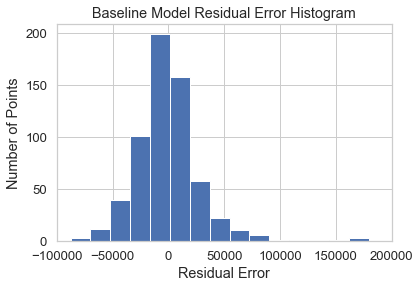

In [167]:
# Plot baseline model residual error histogram
bas_g = plt.hist(base_residual, bins = 15);
plt.xlabel("Residual Error");
plt.ylabel("Number of Points");
plt.title("Baseline Model Residual Error Histogram");
plt.xlim(-100000,200000);

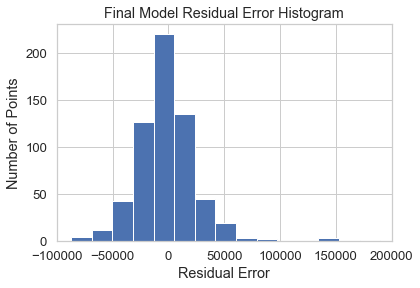

In [168]:
# Plot final model residual error histogram
fin_g = plt.hist(final_residual, bins = 15);
plt.xlabel("Residual Error");
plt.ylabel("Number of Points");
plt.title("Final Model Residual Error Histogram");
plt.xlim(-100000,200000);

Comparing the residual error of the two models, we see that the final model has a significantly better distribution with many more datapoints closer to 0.


---


### 5.2 Analysis of Final Model
[*Jump to table of contents*](#Contents)

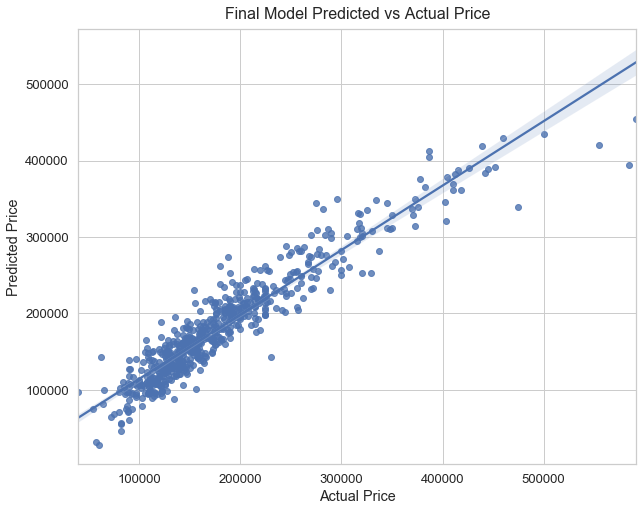

In [169]:
# Plotting final model predicted vs actual price
plt.figure(figsize=(10, 8))
g = sns.regplot(x=yf_valid, y=yf_hat);
g.set_title('Final Model Predicted vs Actual Price', fontsize=16, y=1.01);
plt.xlabel("Actual Price");
plt.ylabel("Predicted Price");

Looking at the scatter plot of actual price and predicted price, we see that there is some difference. This is expected due to irreducible error.

In [170]:
coef_df = pd.DataFrame(data = fin_ols.coef_, index = Xf_train.columns, columns = ['Coefficients'])

In [171]:
coef_df = coef_df.T[list(np.abs(coef_df)['Coefficients'].sort_values(ascending = False).index)].T

In [172]:
coef_df.describe()

,Coefficients
count,30.000000
mean,3625.275592
std,5799.770724
min,-8077.075356
25%,1183.522146
50%,3857.412046
75%,6201.469128
max,17423.188271


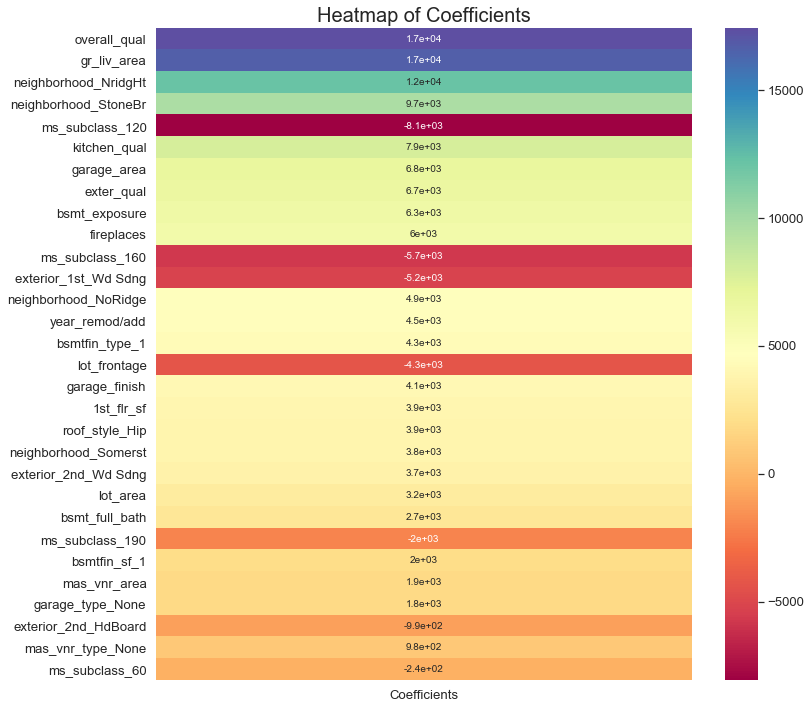

In [173]:
# Apply heatmap to view correlation of features
fig, ax = plt.subplots(figsize=(12,12)) # Using subplots to control figure size
plt.title('Heatmap of Coefficients', fontsize = 20)
sns.heatmap(coef_df,
            vmax=17424, vmin=-8078, cmap='Spectral', annot=True, ax=ax);

* One unit increase in overall_qual correlates with a saleprice increase of $17000

* One unit increase in gr_liv_area correlates with a saleprice increase of $17000

* Being in neighborhood_NridgHt correlates with a saleprice increase of $12000

* Being in neighborhood_StoneBr correlates with a saleprice increase of $9700

* A property of ms_subclass_120 correlates with a saleprice **decrease** of $8100

* One unit increase in kitchen_qual correlates with a saleprice increase of $7900

* One unit increase in garage_area correlates with a saleprice increase of $6800

* One unit increase in exter_qual correlates with a saleprice increase of $6700

* One unit increase in bsmt_exposure correlates with a saleprice increase of $6300

* Having one additional fireplace correlates with a saleprice increase of $6000

* A property of ms_subclass_160 correlates with a saleprice **decrease** of $5700

* A property with exterior_1st_Wd Sdng correlates with a saleprice **decrease** of $5200

* Being in neighborhood_NoRidge correlates with a saleprice increase of $4900

* One unit increase of year_remod/add correlates with a saleprice increase of $4500

* Having a bsmtfin_type_1 correlates with saleprice increase of $4300

* One unit increase in lot_frontage correlates with a saleprice **decrease** of $4300

* One unit increase in garage_finish correlates with a saleprice increase of $4100

* One unit increase in 1st_flr_sf correlates with a saleprice increase of $3900

* Having a roof_style_Hip correlates with a saleprice increase of $3900

* Being in neighborhood_Somerst correlates with a saleprice increase of $3800

* Having a exterior_2nd_Wd Sdng correlates with a saleprice increase of $3700

* One unit increase in lot_area correlates with a saleprice increase of $3200

* One unit increase in bsmt_full_bath correlates with a saleprice increase of $2700

* A property of ms_subclass_190 correlates with a saleprice **decrease** of $2000

* One unit increase in bsmt_sf_1 correlates with a saleprice increase of $2000

* One unit increase in mas_vnr_area correlates with a saleprice increase of $1900

* A property of garage_type_none correlates with a saleprice increase of $1800

* A property of exterior_2nd_HdBoard correlates with a saleprice **decrease** of $990

* A property of mas_vnr_type_None correlates with a saleprice increase of $980

* A property of ms_subclass_60 correlates with a saleprice **decrease** of $240

*for a more in-depth analysis, skip to* [*recommendations*](#7.1-Business-Recommendations)


---


## 6. Kaggle Submission
[*Jump to table of contents*](#Contents)

In this section we will be cleaning our test data and submitting the results to kaggle.

### 6.1 Test Set Cleaning
[*Jump to table of contents*](#Contents)

For data cleaning we will be applying the same processes/steps as what we did on the train dataset.

In [174]:
test = pd.read_csv('datasets/test.csv')

In [175]:
test.shape

(879, 80)

In [176]:
# Replace NaN with 'None' as we did with train set
for value in ['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',\
              'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',\
              'Garage Type', 'Garage Finish', 'Garage Qual',\
              'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']:
    test[value] = test[value].replace(np.nan, 'None')

In [177]:
# Impute missing value with 'None' as we did with train set
test['Mas Vnr Type'] = test['Mas Vnr Type'].replace(np.nan, 'None')

In [178]:
# View null values in test set
test.isnull().sum().sort_values(ascending = False)

Lot Frontage     160
Garage Yr Blt     45
Electrical         1
Mas Vnr Area       1
Sale Type          0
                ... 
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Id                 0
Length: 80, dtype: int64

We will ignore 'Electrical' and 'Garage Yr Blt' as it is not used in our final model.


---


##### Mas Vnr Area

In [179]:
# View row at which 'Mas Vnr Area' is null
test[test['Mas Vnr Area'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
866,868,907260030,60,RL,70.0,8749,Pave,None,Reg,Lvl,...,0,0,0,None,None,None,0,11,2009,WD


In [180]:
# View what columns were used to impute 'Mas Vnr Area' for train set
mva_X_train.columns

Index(['BsmtFin SF 1', 'Year Built', 'Garage Cars', 'Garage Area',
       'Gr Liv Area', '1st Flr SF', 'Total Bsmt SF', 'Overall Qual'],
      dtype='object')

In [181]:
# Creating 'mva_test' for imputing
mva_test = test[test['Mas Vnr Area'].isnull()][['BsmtFin SF 1', 'Year Built', 'Garage Cars',
                                                'Garage Area', 'Gr Liv Area', '1st Flr SF',
                                                'Total Bsmt SF', 'Overall Qual']]

In [182]:
# Scale, fit, and predict
sc = StandardScaler()
sc.fit(mva_X_train)
mva_test_scaled = sc.transform(mva_test)
ols = LinearRegression()
ols.fit(mva_Ztrain, mva_y_train)
ols.predict(mva_test_scaled)

array([118.30266268])

In [183]:
# Impute missing value
test['Mas Vnr Area'][866] = 129.5018907

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


---

##### Lot Frontage

In [184]:
# View rows at which 'Lot Frontage' is null
test[test['Lot Frontage'].isnull()].head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
1,2718,905108090,90,RL,NaN,9662,Pave,None,IR1,Lvl,...,0,0,0,None,None,None,0,8,2006,WD
4,625,535105100,20,RL,NaN,9500,Pave,None,IR1,Lvl,...,0,185,0,None,None,None,0,7,2009,WD
7,858,907202130,20,RL,NaN,9286,Pave,None,IR1,Lvl,...,0,0,0,None,None,None,0,10,2009,WD
13,818,906230030,90,RL,NaN,7976,Pave,None,Reg,Lvl,...,0,0,0,None,None,None,0,10,2009,WD
20,222,905105070,20,RL,NaN,8246,Pave,None,IR1,Lvl,...,0,0,0,None,MnPrv,None,0,5,2010,WD


In [185]:
# View what columns were used to impute 'Mas Vnr Area' for train set
lf_X_train.columns

Index(['Lot Area', '1st Flr SF', 'Gr Liv Area', 'TotRms AbvGrd',
       'Total Bsmt SF', 'Garage Area', 'Garage Cars'],
      dtype='object')

In [186]:
# Creating 'lf_test' for imputing
lf_test = test[test['Lot Frontage'].isnull()][['Lot Area', '1st Flr SF', 'Gr Liv Area', 'TotRms AbvGrd',
                                              'Total Bsmt SF', 'Garage Area', 'Garage Cars']]

In [187]:
# Scale, fit, and predict
sc = StandardScaler()
sc.fit(lf_X_train)
lf_test_scaled = sc.transform(lf_test)
lf_ols = LinearRegression()
lf_ols.fit(lf_Ztrain, lf_y_train)
lf_test_impute = lf_ols.predict(lf_test_scaled)

In [188]:
# Obtain index number for imputation
lf_test_index = test[test['Lot Frontage'].isnull()]['Lot Frontage'].index

In [189]:
# Combine observed and imputed values
new_lf_series = []
n = 0
for i in range(879):
    if i in lf_test_index:
        new_lf_series.append(lf_test_impute[n])
        n += 1
    else:
        new_lf_series.append(test['Lot Frontage'][i])

In [190]:
# Imputer values
test['Lot Frontage'] = new_lf_series

---

##### Ordinal Mapping

In [191]:
# Iterate over the test dataset to map the values.
for column in ordinal_dict:
    for cat in ordinal_dict[column]:
        test[column] = test[column].replace(cat,ordinal_dict[column][cat])


---


##### Standardizing Column Names

In [192]:
test.columns = test.columns.str.lower().str.replace(' ','_')

In [193]:
# Drop all columns not used
test_dropped = test[['overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual',
            'garage_area', '1st_flr_sf', 'garage_finish', 'year_remod/add',
            'mas_vnr_area', 'fireplaces', 'neighborhood', 'bsmt_exposure',
            'bsmtfin_sf_1', 'mas_vnr_type', 'ms_subclass', 'bsmtfin_type_1',
            'lot_frontage', 'lot_area', 'bsmt_full_bath', 'roof_style',
            'garage_type', 'exterior_1st', 'exterior_2nd']]

In [194]:
# View all null values
test_dropped.isnull().sum()

overall_qual      0
exter_qual        0
gr_liv_area       0
kitchen_qual      0
garage_area       0
1st_flr_sf        0
garage_finish     0
year_remod/add    0
mas_vnr_area      0
fireplaces        0
neighborhood      0
bsmt_exposure     0
bsmtfin_sf_1      0
mas_vnr_type      0
ms_subclass       0
bsmtfin_type_1    0
lot_frontage      0
lot_area          0
bsmt_full_bath    0
roof_style        0
garage_type       0
exterior_1st      0
exterior_2nd      0
dtype: int64

In [195]:
test_dropped.dtypes

overall_qual        int64
exter_qual          int64
gr_liv_area         int64
kitchen_qual        int64
garage_area         int64
1st_flr_sf          int64
garage_finish       int64
year_remod/add      int64
mas_vnr_area      float64
fireplaces          int64
neighborhood       object
bsmt_exposure       int64
bsmtfin_sf_1        int64
mas_vnr_type       object
ms_subclass         int64
bsmtfin_type_1      int64
lot_frontage      float64
lot_area            int64
bsmt_full_bath      int64
roof_style         object
garage_type        object
exterior_1st       object
exterior_2nd       object
dtype: object

In [196]:
# Changing ms_subclass to string
test_dropped['ms_subclass'] = test_dropped['ms_subclass'].astype(str)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [197]:
# View dtypes of remaining features
test_dropped.dtypes

overall_qual        int64
exter_qual          int64
gr_liv_area         int64
kitchen_qual        int64
garage_area         int64
1st_flr_sf          int64
garage_finish       int64
year_remod/add      int64
mas_vnr_area      float64
fireplaces          int64
neighborhood       object
bsmt_exposure       int64
bsmtfin_sf_1        int64
mas_vnr_type       object
ms_subclass        object
bsmtfin_type_1      int64
lot_frontage      float64
lot_area            int64
bsmt_full_bath      int64
roof_style         object
garage_type        object
exterior_1st       object
exterior_2nd       object
dtype: object


---


##### Get Dummies

In [198]:
# Get dummies for features
test_dummies = pd.get_dummies(test_dropped)

In [199]:
# View shape
test_dummies.shape

(879, 104)

In [200]:
# Exclude all unncessary dummies
test_dummies = test_dummies[optimal_ols]

In [201]:
# View columns
test_dummies.columns

Index(['overall_qual', 'exter_qual', 'gr_liv_area', 'kitchen_qual',
       'garage_area', '1st_flr_sf', 'garage_finish', 'year_remod/add',
       'mas_vnr_area', 'fireplaces', 'neighborhood_NridgHt', 'bsmt_exposure',
       'bsmtfin_sf_1', 'mas_vnr_type_None', 'ms_subclass_60', 'bsmtfin_type_1',
       'lot_frontage', 'lot_area', 'bsmt_full_bath', 'roof_style_Hip',
       'neighborhood_NoRidge', 'neighborhood_StoneBr', 'garage_type_None',
       'exterior_1st_Wd Sdng', 'exterior_2nd_Wd Sdng', 'neighborhood_Somerst',
       'ms_subclass_160', 'ms_subclass_190', 'exterior_2nd_HdBoard',
       'ms_subclass_120'],
      dtype='object')


---


### 6.2 Test Set Prediction & Results
[*Jump to table of contents*](#Contents)

In [202]:
# Initialize features and target
X = train_dummies[optimal_ols] # should be optimal_ols
y = train_dummies['saleprice']

# Scale/normalize features
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X)
X_test_scaled = ss.fit_transform(test_dummies)

# Initialize Linear Regression Model
ols = LinearRegression() # should be lasso
ols.fit(X_train_scaled, y)

y_hat = ols.predict(X_test_scaled)

In [203]:
# Placing predicted data into dataframe along with ID
submission = pd.DataFrame({'Id':test['id'],'SalePrice':y_hat})

In [204]:
# View first 5 rows of submission dataframe
submission.head()

,Id,SalePrice
0,2658,121929.272327
1,2718,165526.139196
2,2414,226690.878788
3,1989,126741.556472
4,625,177431.171583


In [205]:
# Export results to CSV for submission
submission.to_csv('datasets/kagglepredictions4.csv',index=False)


---


##### Kaggle Results
![Kaggle Results](kaggleresults.png)


As reflected above, our model obtained a public score of 32816 and a private score of 31464. This is slightly more than a 10% difference from our validation RMSE of around 27000. The reason for the discrepancy in test and validation results could be due to the following reasons:
* Because there will be some differences in datasets, there could be a significant amount of outliers in the test dataset.
* Our model could be slightly underfitted(high bias, low variance) causing the model not to adapt to the new data.


---


## 7. Conclusion
[*Jump to table of contents*](#Contents)

In this section we will be summarizing our findings, business recommendations, final thoughts, and further work.

### 7.1 Business Recommendations
[*Jump to table of contents*](#Contents)

#### Findings

* **Space**
    * One square foot increase in above grade(ground) living area correlates with a saleprice increase of $17000

    * One square foot increase in garage area correlates with a saleprice increase of $6800

    * One square foot increase in lot frontage correlates with a saleprice **decrease** of $4300

    * One square foot increase on the first floor correlates with a saleprice increase of $3900

    * One square foot increase in lot area correlates with a saleprice increase of $3200

    * One square foot increase in the basement correlates with a saleprice increase of $2000

    * One square foot increase in masonry veneer correlates with a saleprice increase of $1900



* **Quality**
    * One grade increase in overall material and finish quality correlates with a saleprice increase of $17000

    * One grade increase in kitchen quality correlates with a saleprice increase of $7900

    * One grade increase in external material quality correlates with a saleprice increase of $6700
    
    * One grade increase in walkout or garden level basement walls correlates with a saleprice increase of $6300


* **Location**
    * A property in Northridge Heights correlates with a saleprice increase of $12000

    * A property in Stone Brook correlates with a saleprice increase of $9700

    * A property in Northridge correlates with a saleprice increase of $4900

    * A property in Somerset correlates with a saleprice increase of $3800


* **Type**

    * A 1-story planned unit development built in 1946 or newer correlates with a saleprice **decrease** of $8100

    * A 2-story planned unit development built in 1946 or newer correlates with a saleprice **decrease** of $5700

    * A 2 family conversion property correlates with a saleprice **decrease** of $2000

    * A 2-story home built in 1946 or newer correlates with a saleprice **decrease** of $240


* **Features**
    * Having one additional fireplace correlates with a saleprice increase of $6000

    * A property with exterior covering of wood siding correlates with a saleprice **decrease** of $5200

    * The more recently a property is remodelled correlates with a saleprice increase of $4500 per year.

    * One grade increase in basement finish correlates with saleprice increase of $4300

    * One grade increase in garage finish correlates with a saleprice increase of $4100

    * Having a hip roof style correlates with a saleprice increase of $3900

    * Having a secondary exterior covering wood correlates with a saleprice increase of $3700

    * One additional bathroom correlates with a saleprice increase of $2700

    * Not having a garage correlates with a saleprice increase of $1800

    * Having a secondary exterior covering of hard board correlates with a saleprice **decrease** of $990

    * Not having masonry veneer correlates with a saleprice increase of $980

---

#### Interpretation

* **Real Estate Developers (Primary Stakeholders)**

    * Build additional floors for livable space if the cost is less than $17000 per square foot

    * Increase garage area if cost is less than $6800 per square foot

    * Increase first story space if cost is less than $3900 per square foot

    * Increase lot area if cost is less than $3200 per square foot

    * Increase basement area if cost is less than $2000 per square foot

    * Increase masonry veneer if cost is less than $1900 per square foot

    * Increase quality of material and finish if cost per grade is less than $17000

    * Increase quality of kitchen if cost per grade is less than $7900

    * Increase quality of external material if cost per grade is less than $6700

    * Avoid developing planned unit development and 2 family conversion properties.

    * Add an additional fireplace if the cost is less than $6000

    * Avoid exterior covering of wood unless it can reduce cost by more than $5200

Although these are general actions that real estate developers can take, it should be noted that it may not be applicable for all cases. For example, we see that with fireplaces the saleprice does not significantly increase beyond 2 fireplaces. This means that developers should only consider increasing or adding features when these features reside are on the lower side of the spectrum.

* **Individuals Looking for a Home (Secondary Stakeholders)**

    * Buy a house without a fireplace and install it on your own as the cost will be significantly lower. [[1]](#7.3-Citations)
    * If on a tight budget, do consider planned development units as they can fetch for lower prices.
    * It may be wise to find a property with an unfurnished kitchen if you can keep furnishing costs low.
    * Avoid locations such as Northridge, Northridge Heights, Stone Brook, and Somerset if on a tight budget.

---

#### Answers to Questions

* What features are most relevant for a real estate developer to increase the price of a home?
    * Quality of walkout or garden level basement walls
    * Fireplace
    * Quality of garage finish
* In what ways can a real estate developer re-allocate flooring space to increase the price of a home?
    * Increase above ground living area
    * Increase garage area
    * Reduce lot frontage
* What feature quality is the most relevant to the price of a home?
    * Overall material and finish quality
    * External material quality
* What locations should prospective home-owners avoid if they are on a tight budget?
    * Northridge Heights
    * Stone Brook
    * Northridge
    * Somerset
* What features should home-owners exclude to reduce cost?
    * Fireplace
    * Basement Finish


### 7.2 Limitations
[*Jump to table of contents*](#Contents)

* Some of the ordinal features had grades such as excellent, good, and average. Because these categories are not quantitative, it is hard to give specific suggestions without some assumption.


* Some features could have a non-linear correlation with sale price, which would mean that the inferences we take from our coefficients may have a grain of salt. One way to investigate would be to see if features have a polynomial relationship with saleprice by running a regression with various polynomial degrees. However, this approach would be time consuming and should only be done sparingly on features of high importance.


* The model we have built is only accurate to a certain degree. As housing prices is largely determined by the market, any change in consumer behaviour would be reflected in the saleprice. This means that over time it is likely that our model is likely to perform worse.

### 7.3 Conclusion
[*Jump to table of contents*](#Contents)

In conclusion, this analysis has successfully identified key features for developers and prospective home-owners alike. A final regression model was also found with 30 features, having a RMSE within pre-defined limits (under 35000). 

Our final model consisted of 30 features utilizing a ordinary least squares model. Although our final model may have been slightly underfit, for a kaggle submission it is better to err on the side of underfitting due to the variability of a test dataset.

The findings suggests that homeowners tend to heavily favor living area above ground in favor of living area underground. It also suggests that many homeowners are willing to pay for better overall quality/materials. The data also points out that one of the best features for a developer to include is a fireplace.

Overall this analysis has beeen a success, however there is always room for improvement.

### 7.4 Further Work
[*Jump to table of contents*](#Contents)

* It may be worth exploring if constructing various models split by location, or housing type may give better results. For example, constructing a model for each housing type to see if we can more accurately pinpoint saleprice.


* Polynomial features could be modelled individually against saleprice to determine if they have a polynomial relationship with saleprice.


* K-nearest neighbors could be used to impute missing ordinal data.


* Iteration and sampling of RMSE values could be applied and then a categorization model could be built to classify these features as 'useful' or 'not useful'.


---


### 7.5 Citations
[*Jump to table of contents*](#Contents)

[1]https://homeguide.com/costs/fireplace-installation-cost


---


### Runtime
[*Jump to table of contents*](#Contents)

In [206]:
print(f"--- {round((time.time() - start_time)/60, 2)} minutes ---")

--- 32.97 minutes ---
